## Imports

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2

## Read CSV

In [28]:
# Read csv
data = pd.read_csv('online_pre_processing.csv')
print("Shape: " + str(data.shape))

Shape: (25782, 24)


## Gaze and Head Positions Adjusts

In [29]:
timeBlock = 10 # minutes
time_adjust = '10s'

In [30]:


data['datetime'] = pd.to_datetime(data['datetime'])
data['time_block'] = (data['datetime'] - data['datetime'].min()).dt.total_seconds() // (60 * timeBlock)
persons = data['person'].unique()

for person in persons:
    mask_person = data['person'] == person
    
    
    for block in data.loc[mask_person, 'time_block'].unique():
        mask_block = (data['time_block'] == block) & mask_person # Intersection between person and block
        data_person_block = data[mask_block]
        
        data.loc[mask_block, 'gaze_pitch_mean'] = data_person_block['gaze_pitch'].mean()
        data.loc[mask_block, 'gaze_yaw_mean'] = data_person_block['gaze_yaw'].mean()
        data.loc[mask_block, 'head_pitch_mean'] = data_person_block['head_pitch'].mean()
        data.loc[mask_block, 'head_yaw_mean'] = data_person_block['head_yaw'].mean()
        data.loc[mask_block, 'head_roll_mean'] = data_person_block['head_roll'].mean()

In [31]:
data.set_index('datetime', inplace=True)
result = []

for (person, time_block), group in data.groupby(['person', 'time_block']):

    group['gaze_pitch_adjusted'] = group['gaze_pitch'].resample(time_adjust).transform('mean') - group['gaze_pitch_mean'].iloc[0]
    group['gaze_yaw_adjusted'] = group['gaze_yaw'].resample(time_adjust).transform('mean') - group['gaze_yaw_mean'].iloc[0]
    group['head_pitch_adjusted'] = group['head_pitch'].resample(time_adjust).transform('mean') - group['head_pitch_mean'].iloc[0]
    group['head_yaw_adjusted'] = group['head_yaw'].resample(time_adjust).transform('mean') - group['head_yaw_mean'].iloc[0]
    group['head_roll_adjusted'] = group['head_roll'].resample(time_adjust).transform('mean') - group['head_roll_mean'].iloc[0]
    
    result.append(group)

data = pd.concat(result).sort_index()
data.reset_index(inplace=True)

### No adjust 

In [32]:
data.set_index('datetime', inplace=True)
result = []

for person, group in data.groupby('person'):

    group['gaze_pitch_10s'] = group['gaze_pitch'].resample(time_adjust).transform('mean')
    group['gaze_yaw_10s'] = group['gaze_yaw'].resample(time_adjust).transform('mean')
    group['head_pitch_10s'] = group['head_pitch'].resample(time_adjust).transform('mean')
    group['head_yaw_10s'] = group['head_yaw'].resample(time_adjust).transform('mean')
    group['head_roll_10s'] = group['head_roll'].resample(time_adjust).transform('mean')
    
    result.append(group)

data = pd.concat(result).sort_index()
data.reset_index(inplace=True)

### Check Data

In [33]:
# Check the data
print("_________________________")
print(f"Size Block: {timeBlock} minutes")
print(data['time_block'].value_counts())
print("_________________________")

print("Duration:")
print(str((data['datetime'].max() - data['datetime'].min()).seconds / 60) + " minutes")
print("_________________________")


persons = data['person'].unique()

for person in persons:
    print(f"Person: {person}")
    data_person = data[data['person'] == person]
    print(f"Head Yaw values: {data_person['head_yaw_mean'].unique()}")
    print(f"Head Pitch values: {data_person['head_pitch_mean'].unique()}")
    print(f"Head Roll values: {data_person['head_roll_mean'].unique()}")
    print(f"Gaze Yaw values: {data_person['gaze_yaw_mean'].unique()}")
    print(f"Gaze Pitch values: {data_person['gaze_pitch_mean'].unique()}")
    print("_________________________")

_________________________
Size Block: 10 minutes
time_block
1.0    12706
0.0    11626
2.0     1450
Name: count, dtype: int64
_________________________
Duration:
21.133333333333333 minutes
_________________________
Person: 0
Head Yaw values: [ -8.61570368 -10.54670894 -22.09711864]
Head Pitch values: [-2.38512656 -4.11075781  4.09974576]
Head Roll values: [-0.42981775 -0.02178781  0.05415254]
Gaze Yaw values: [-13.16628755 -17.92399629 -18.20788136]
Gaze Pitch values: [-4.08985488 -4.29335911 -6.12909605]
_________________________
Person: 3
Head Yaw values: [-19.45210852 -11.29115505  -7.31455041]
Head Pitch values: [6.80336854 8.7318393  2.28594005]
Head Roll values: [-9.31798252 -4.81269303 -7.10953678]
Gaze Yaw values: [-22.64798252 -15.09270245   1.87828338]
Gaze Pitch values: [ -5.24749454  -6.57928437 -11.37509537]
_________________________
Person: 1
Head Yaw values: [ 1.46596141 -0.24288396 -3.40459239]
Head Pitch values: [15.31908764  6.49497692  2.91994565]
Head Roll values: [2

In [34]:

print("#######################")
print(f"Adjusted value: {time_adjust}")
print(f"Block size: {timeBlock} minutes")
print("#######################")
print("_________________________")

for person in persons:
    person_data = data[data['person'] == person]
    print(f"Person: {person}")
    print((person_data['head_yaw_adjusted'].describe()).astype(int))        # Head Yaw
    # print((person_data['head_pitch_adjusted'].describe()))      # Head Pitch
    # print((person_data['head_roll_adjusted'].describe()).astype(int))       # Head Roll
    # print((person_data['gaze_yaw_adjusted'].describe()).astype(int))   # Gaze Yaw
    # print((person_data['gaze_pitch_adjusted'].describe()).astype(int))      # Gaze Pitch
    print("_________________________")    

#######################
Adjusted value: 10s
Block size: 10 minutes
#######################
_________________________
Person: 0
count    6550
mean        0
std         9
min       -32
25%        -5
50%         1
75%         6
max        19
Name: head_yaw_adjusted, dtype: int32
_________________________
Person: 3
count    6299
mean        0
std        11
min       -31
25%        -6
50%         2
75%         8
max        22
Name: head_yaw_adjusted, dtype: int32
_________________________
Person: 1
count    6675
mean        0
std         5
min       -11
25%        -3
50%        -1
75%         1
max        19
Name: head_yaw_adjusted, dtype: int32
_________________________
Person: 2
count    6258
mean        0
std         8
min       -38
25%        -4
50%         1
75%         5
max        19
Name: head_yaw_adjusted, dtype: int32
_________________________


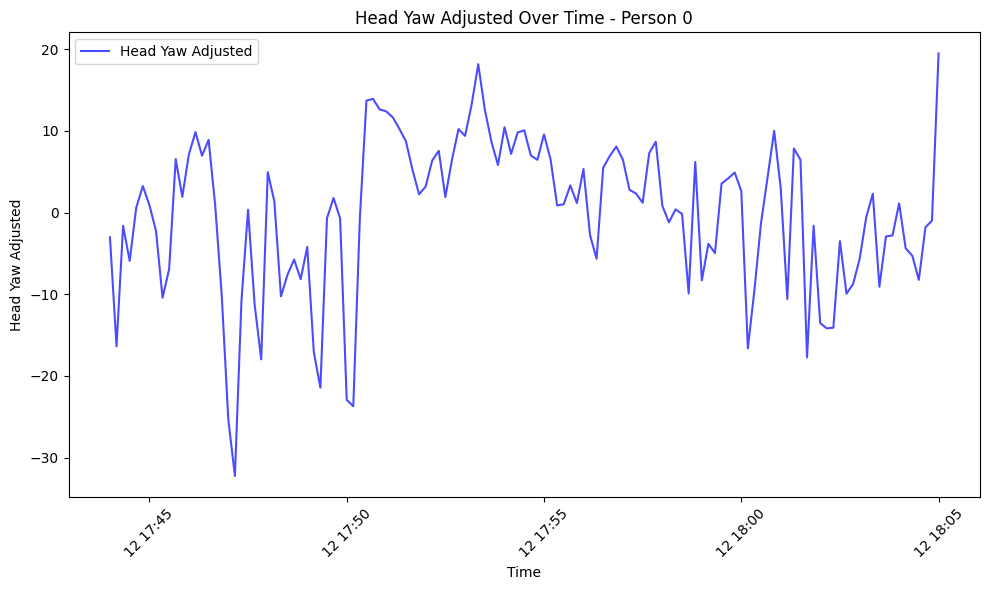

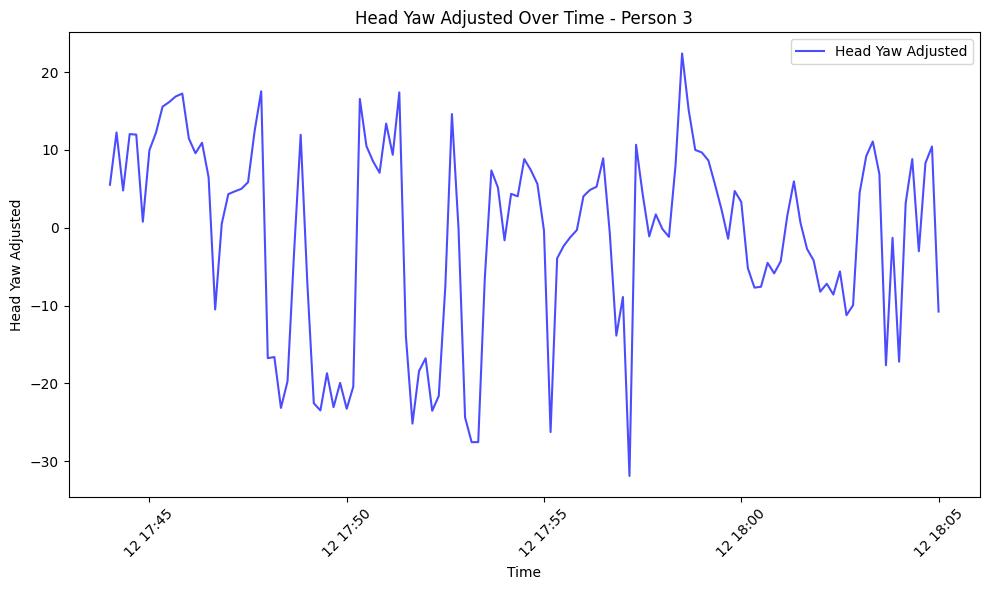

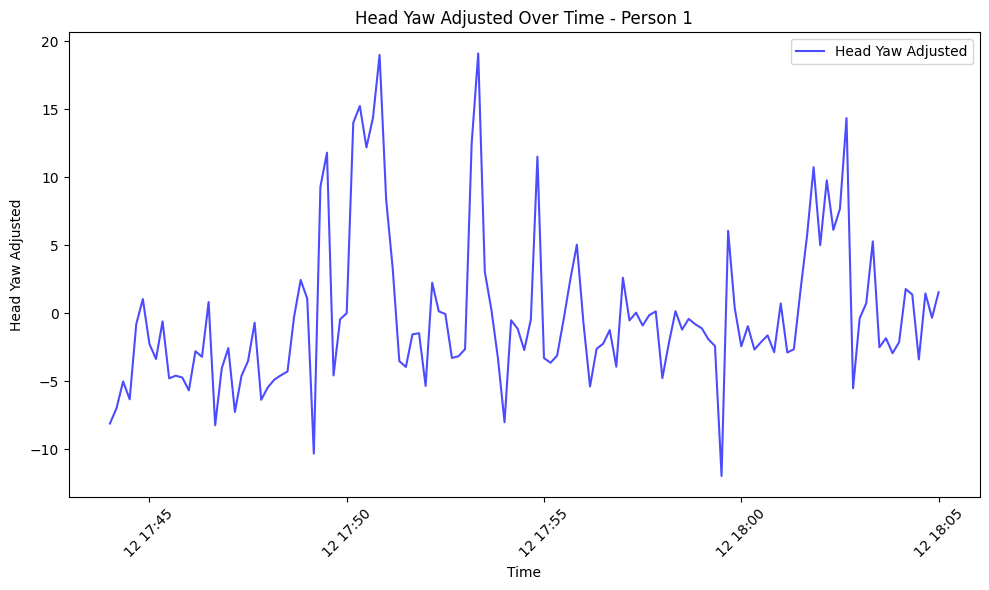

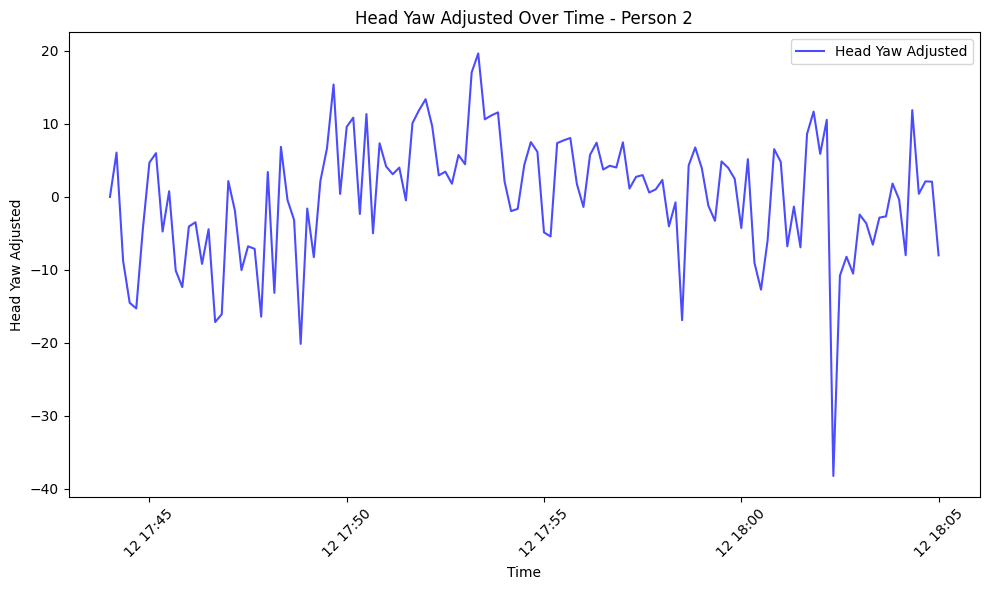

In [35]:
data_graphic = data.copy()
data_graphic.set_index('datetime', inplace=True)
persons = data_graphic['person'].unique()

for person in persons:
    data_person = data_graphic[data_graphic['person'] == person]
    grouped_data = data_person['head_yaw_adjusted'].resample(time_adjust).mean()
    
    plt.figure(figsize=(10, 6))
    plt.plot(grouped_data.index, grouped_data.values, color='blue', label='Head Yaw Adjusted', alpha=0.7)
    plt.title(f'Head Yaw Adjusted Over Time - Person {person}')
    plt.xlabel('Time')
    plt.ylabel('Head Yaw Adjusted')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()



## Variation in facial movement for each person

In [36]:
person1 = data['person'].unique()

for i in person1:
    data_person_i = data[data['person'] == i]

    face_width = data_person_i['face_bbox_x2'] - data_person_i['face_bbox_x1']
    average_pixel_per_cm = (face_width/12).mean() # 12 centimeters is the value by default for a face's width

    data.loc[data_person_i.index, 'head_movement_x_abs'] = (data_person_i['face_center_x'].diff().bfill() / average_pixel_per_cm).abs()
    data.loc[data_person_i.index, 'head_movement_x_abs_no_adjust'] = (data_person_i['face_center_x'].diff().bfill()).abs()
    data.loc[data_person_i.index, 'head_movement_y_abs'] = (data_person_i['face_center_y'].diff().bfill() / average_pixel_per_cm).abs()
    data.loc[data_person_i.index, 'head_movement_y_abs_no_adjust'] = (data_person_i['face_center_y'].diff().bfill()).abs()
    data.loc[data_person_i.index, 'head_movement_z_abs'] = (face_width.diff().bfill() / average_pixel_per_cm).abs()
    data.loc[data_person_i.index, 'head_movement_z_abs_no_adjust'] = (face_width.diff().bfill()).abs()

    # CALCULAR ESTES VALORES CONSIDERANDO O CENTRO



### Check Data

In [37]:
print("_________________________")
print(data['head_movement_x_abs'].describe())
print("_________________________")
print(data['head_movement_y_abs'].describe())
print("_________________________")
print(data['head_movement_z_abs'].describe())
print("_________________________")

_________________________
count    25782.000000
mean         0.192386
std          0.410748
min          0.000000
25%          0.000000
50%          0.099882
75%          0.204880
max         16.512076
Name: head_movement_x_abs, dtype: float64
_________________________
count    25782.000000
mean         0.125048
std          0.237572
min          0.000000
25%          0.000000
50%          0.056355
75%          0.149824
max         13.412539
Name: head_movement_y_abs, dtype: float64
_________________________
count    25782.000000
mean         0.153947
std          0.216134
min          0.000000
25%          0.000000
50%          0.099882
75%          0.205193
max          3.898659
Name: head_movement_z_abs, dtype: float64
_________________________


In [38]:
print("_________________________")
values = data.groupby(['person'])['head_movement_x_abs'].mean()
print(values)
print("_________________________")
values = data.groupby(['person'])['head_movement_y_abs'].mean()
print(values)
print("_________________________")
values = data.groupby(['person'])['head_movement_z_abs'].mean()
print(values)
print("_________________________")

_________________________
person
0    0.121826
1    0.173192
2    0.292849
3    0.186288
Name: head_movement_x_abs, dtype: float64
_________________________
person
0    0.096124
1    0.114293
2    0.128484
3    0.163107
Name: head_movement_y_abs, dtype: float64
_________________________
person
0    0.144990
1    0.153087
2    0.158325
3    0.159824
Name: head_movement_z_abs, dtype: float64
_________________________


#### No adjust

In [39]:
print("_________________________")
print(data['head_movement_x_abs_no_adjust'].describe())
print("_________________________")
print(data['head_movement_y_abs_no_adjust'].describe())
print("_________________________")
print(data['head_movement_z_abs_no_adjust'].describe())
print("_________________________")

_________________________
count    25782.000000
mean         1.279148
std          2.708785
min          0.000000
25%          0.000000
50%          0.500000
75%          1.500000
max        146.500000
Name: head_movement_x_abs_no_adjust, dtype: float64
_________________________
count    25782.000000
mean         0.894481
std          1.830654
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max        119.000000
Name: head_movement_y_abs_no_adjust, dtype: float64
_________________________
count    25782.000000
mean         1.095958
std          1.615528
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         38.000000
Name: head_movement_z_abs_no_adjust, dtype: float64
_________________________


In [40]:
print("_________________________")
values = data.groupby(['person'])['head_movement_x_abs_no_adjust'].mean()
print(values)
print("_________________________")
values = data.groupby(['person'])['head_movement_y_abs_no_adjust'].mean()
print(values)
print("_________________________")
values = data.groupby(['person'])['head_movement_z_abs_no_adjust'].mean()
print(values)
print("_________________________")

_________________________
person
0    1.219695
1    0.844045
2    1.429370
3    1.652802
Name: head_movement_x_abs_no_adjust, dtype: float64
_________________________
person
0    0.962366
1    0.557004
2    0.627117
3    1.447134
Name: head_movement_y_abs_no_adjust, dtype: float64
_________________________
person
0    1.451603
1    0.746067
2    0.772771
3    1.418003
Name: head_movement_z_abs_no_adjust, dtype: float64
_________________________


### Outliers

In [41]:
# person1 = data['person'].unique()
# print(data.shape)


# for i in person1:
#     data_person_i = data[data['person'] == i]
#     columns_to_check = ['head_movement_x_abs', 'head_movement_y_abs', 'head_movement_z_abs']

#     for column in columns_to_check:
        

#         lower_bound = data[column].quantile(0.01)
#         upper_bound = data[column].quantile(0.999)
#         data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# print("Without Outliers: " + str(data.shape))


# REMOVER ESTES OUTLIERS E TESTAR DE OUTRA FORMA CONSIDERANDO O VALOR DO TAMANHO DA CAIXA (LARGURA)

### Group in intervals

In [42]:
person1 = data['person'].unique()

for i in person1:
    data_person_i = data[data['person'] == i]
    columns_to_group = ['head_movement_x_abs', 'head_movement_y_abs', 'head_movement_z_abs']

    for column in columns_to_group:
        data_person_grouped = data_person_i.groupby(pd.Grouper(key='datetime', freq=time_adjust))[column].mean().reset_index()
        data_person_grouped.columns = ['datetime', f'{column}_{time_adjust}']

        for j in data_person_grouped.values:
            start_time = j[0]
            time_delta = pd.to_timedelta(time_adjust)
            end_time = start_time + time_delta
            mask = (data['datetime'] >= start_time) & (data['datetime'] < end_time) & (data['person'] == i)
            data.loc[mask, f'{column}_{time_adjust}'] = j[1]

#### Check Data

In [43]:
print("_________________________")
print(data['head_movement_x_abs_10s'].describe())
print("_________________________")
print(data['head_movement_y_abs_10s'].describe())
print("_________________________")
print(data['head_movement_z_abs_10s'].describe())
print("_________________________")

_________________________
count    25782.000000
mean         0.192386
std          0.176185
min          0.001970
25%          0.072914
50%          0.144061
75%          0.253693
max          1.186966
Name: head_movement_x_abs_10s, dtype: float64
_________________________
count    25782.000000
mean         0.125048
std          0.090956
min          0.007588
25%          0.063941
50%          0.108363
75%          0.160307
max          0.807758
Name: head_movement_y_abs_10s, dtype: float64
_________________________
count    25782.000000
mean         0.153947
std          0.081002
min          0.003940
25%          0.091058
50%          0.143416
75%          0.199765
max          0.463970
Name: head_movement_z_abs_10s, dtype: float64
_________________________


In [44]:
print("_________________________")
values = data.groupby(['person'])['head_movement_x_abs_10s'].mean()
print(values)
print("_________________________")
values = data.groupby(['person'])['head_movement_y_abs_10s'].mean()
print(values)
print("_________________________")
values = data.groupby(['person'])['head_movement_z_abs_10s'].mean()
print(values)
print("_________________________")


_________________________
person
0    0.121826
1    0.173192
2    0.292849
3    0.186288
Name: head_movement_x_abs_10s, dtype: float64
_________________________
person
0    0.096124
1    0.114293
2    0.128484
3    0.163107
Name: head_movement_y_abs_10s, dtype: float64
_________________________
person
0    0.144990
1    0.153087
2    0.158325
3    0.159824
Name: head_movement_z_abs_10s, dtype: float64
_________________________


## Difference between Gaze and Head Position

In [45]:
data['head_gaze_diff_yaw_abs'] = (data['head_yaw_adjusted'] - data['gaze_yaw_adjusted']).abs()
data['head_gaze_diff_pitch_abs'] = (data['head_pitch_adjusted'] - data['gaze_pitch_adjusted']).abs()

## Engagement

### Normalize Data

In [46]:
dataNormalized = pd.DataFrame()
# Difference between the head and gaze angles
dataNormalized['head_gaze_diff_yaw_abs_Normalized'] = data['head_gaze_diff_yaw_abs']/data['head_gaze_diff_yaw_abs'].max()
dataNormalized['head_gaze_diff_pitch_abs_Normalized'] = data['head_gaze_diff_pitch_abs']/data['head_gaze_diff_pitch_abs'].max()

# Normalize the values of head angles
dataNormalized['head_pitch_abs_Normalized'] = data['head_pitch_adjusted'].abs()/data['head_pitch_adjusted'].abs().max()
dataNormalized['head_yaw_abs_Normalized'] = data['head_yaw_adjusted'].abs()/data['head_yaw_adjusted'].abs().max()
dataNormalized['head_roll_abs_Normalized'] = data['head_roll_adjusted'].abs()/data['head_roll_adjusted'].abs().max()

# Normalize the values of the non adjusted head angles
dataNormalized['head_pitch_abs_Normalized_no_adjust'] = data['head_pitch_10s'].abs()/data['head_pitch_10s'].abs().max()
dataNormalized['head_yaw_abs_Normalized_no_adjust'] = data['head_yaw_10s'].abs()/data['head_yaw_10s'].abs().max()
dataNormalized['head_roll_abs_Normalized_no_adjust'] = data['head_roll_10s'].abs()/data['head_roll_10s'].abs().max()

# Normalize the values of gaze angles
dataNormalized['gaze_pitch_abs_Normalized'] = data['gaze_pitch_adjusted'].abs()/data['gaze_pitch_adjusted'].abs().max()
dataNormalized['gaze_yaw_abs_Normalized'] = data['gaze_yaw_adjusted'].abs()/data['gaze_yaw_adjusted'].abs().max()

# Normalize the values of the non adjusted gaze angles
dataNormalized['gaze_pitch_abs_Normalized_no_adjust'] = data['gaze_pitch_10s'].abs()/data['gaze_pitch_10s'].abs().max()
dataNormalized['gaze_yaw_abs_Normalized_no_adjust'] = data['gaze_yaw_10s'].abs()/data['gaze_yaw_10s'].abs().max()

# Normalize the movement of the head
dataNormalized['head_movement_x_Normalized'] = data['head_movement_x_abs']/data['head_movement_x_abs'].max()
dataNormalized['head_movement_x_abs_10s_Normalized'] = data['head_movement_x_abs_10s']/data['head_movement_x_abs_10s'].max()
dataNormalized['head_movement_x_abs_Normalized_no_adjust'] = data['head_movement_x_abs_no_adjust']/data['head_movement_x_abs_no_adjust'].max()
dataNormalized['head_movement_y_Normalized'] = data['head_movement_y_abs']/data['head_movement_y_abs'].max()
dataNormalized['head_movement_y_abs_10s_Normalized'] = data['head_movement_y_abs_10s']/data['head_movement_y_abs_10s'].max()
dataNormalized['head_movement_y_abs_Normalized_no_adjust'] = data['head_movement_y_abs_no_adjust']/data['head_movement_y_abs_no_adjust'].max()
dataNormalized['head_movement_z_Normalized'] = data['head_movement_z_abs']/data['head_movement_z_abs'].max()
dataNormalized['head_movement_z_abs_10s_Normalized'] = data['head_movement_z_abs_10s']/data['head_movement_z_abs_10s'].max()
dataNormalized['head_movement_z_abs_Normalized_no_adjust'] = data['head_movement_z_abs_no_adjust']/data['head_movement_z_abs_no_adjust'].max()

In [47]:
gaze_yaw = dataNormalized['gaze_yaw_abs_Normalized']
gaze_pitch = dataNormalized['gaze_pitch_abs_Normalized']
gaze = (1 - (0.5 * gaze_pitch + 0.5 * gaze_yaw))
gaze_no_adjust = (1 - (0.5 * dataNormalized['gaze_yaw_abs_Normalized_no_adjust'] + 0.5 * dataNormalized['gaze_pitch_abs_Normalized_no_adjust']))

head_yaw = dataNormalized['head_yaw_abs_Normalized']
head_pitch = dataNormalized['head_pitch_abs_Normalized']
head_roll = dataNormalized['head_roll_abs_Normalized']
head = (1 - (0.333 * head_pitch + 0.333 * head_yaw + 0.333 * head_roll))
head_no_adjust = (1 - (0.333 * dataNormalized['head_pitch_abs_Normalized_no_adjust'] + 0.333 * dataNormalized['head_yaw_abs_Normalized_no_adjust'] + 0.333 * dataNormalized['head_roll_abs_Normalized_no_adjust']))


head_gaze_diff_yaw = dataNormalized['head_gaze_diff_yaw_abs_Normalized']
head_gaze_diff_pitch = dataNormalized['head_gaze_diff_pitch_abs_Normalized']
head_gaze_diff = (1 - (0.5 * head_gaze_diff_pitch + 0.5 * head_gaze_diff_yaw))

head_movement_x = dataNormalized['head_movement_x_Normalized']
head_movement_x_10s = dataNormalized['head_movement_x_abs_10s_Normalized']
head_movement_y = dataNormalized['head_movement_y_Normalized']
head_movement_y_10s = dataNormalized['head_movement_y_abs_10s_Normalized']
head_movement_z = dataNormalized['head_movement_z_Normalized']
head_movement_z_10s = dataNormalized['head_movement_z_abs_10s_Normalized']
head_movement = (1 - (0.333 * head_movement_x + 0.333 * head_movement_y + 0.333 * head_movement_z))
head_movement_10s = (1 - (0.333 * head_movement_x_10s + 0.333 * head_movement_y_10s + 0.333 * head_movement_z_10s))
head_movement_no_adjust = (1 - (0.333 * dataNormalized['head_movement_x_abs_Normalized_no_adjust'] + 0.333 * dataNormalized['head_movement_y_abs_Normalized_no_adjust'] + 0.333 * dataNormalized['head_movement_z_abs_Normalized_no_adjust']))



data['engagement0'] = 0.333 * head + 0.333 * gaze + 0.333 * head_movement_10s
data['engagement1'] = 0.25 * head + 0.25 * gaze + 0.25 * head_gaze_diff + 0.25 * head_movement_10s
data['engagement2'] = 0.25 * (1 - head_yaw) + 0.25 * (1 - gaze_yaw) + 0.25 * (1 - head_roll) + 0.25 * head_gaze_diff
data['engagement3'] = 0.20 * head + 0.20 * gaze + 0.20 * head_gaze_diff + 0.20 * head_movement_10s + 0.20 * (1 - head_yaw)
data['engagement4'] = 0.25 * (1 - head_pitch) + 0.25 * (1 - gaze_pitch) + 0.25 * (1 - head_roll) + 0.25 * head_gaze_diff
data['engagement5'] = head
data['engagement6'] = head_no_adjust
data['engagement7'] = gaze
data['engagement8'] = gaze_no_adjust
data['engagement9'] = head_gaze_diff
data['engagement10'] = head_movement
data['engagement11'] = head_movement_10s
data['engagement12'] = head_movement_no_adjust

person
0    0.783486
1    0.832090
2    0.788332
3    0.771430
Name: engagement0, dtype: float64
Gráfico salvo como: engagement0.png


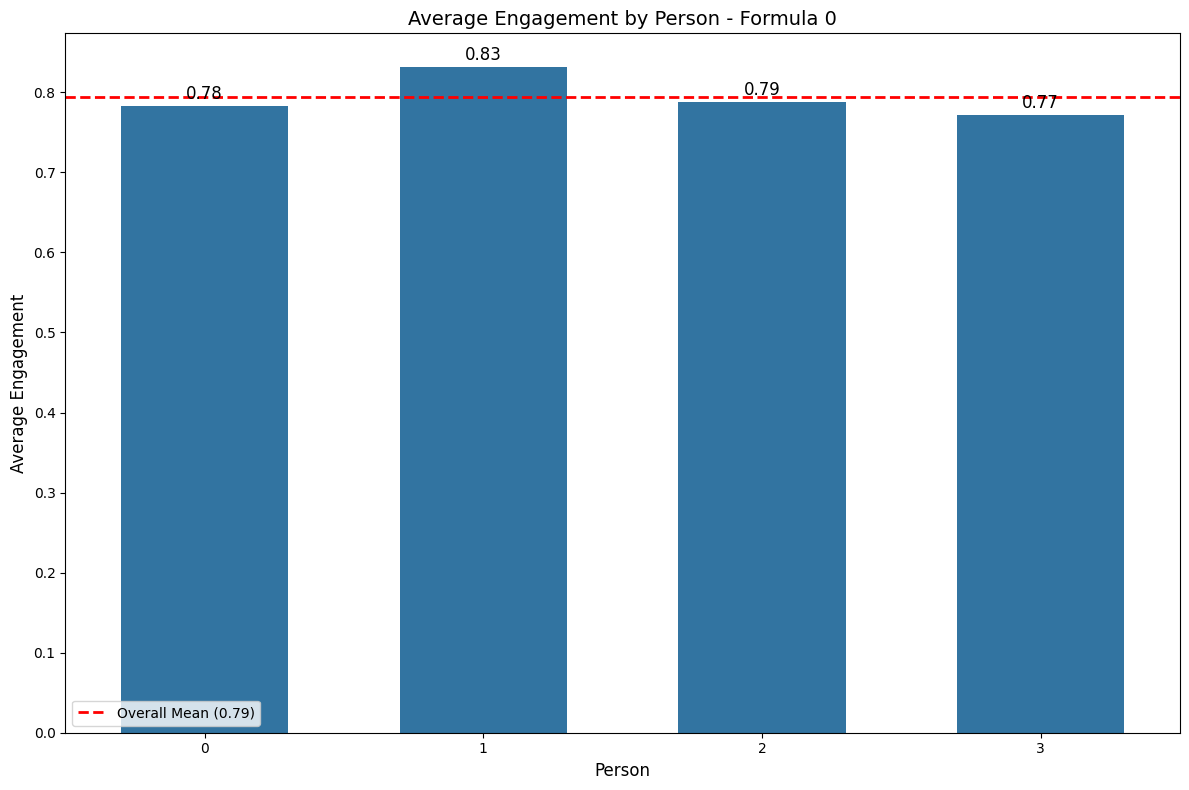

person
0    0.789534
1    0.856009
2    0.800157
3    0.779094
Name: engagement1, dtype: float64
Gráfico salvo como: engagement1.png


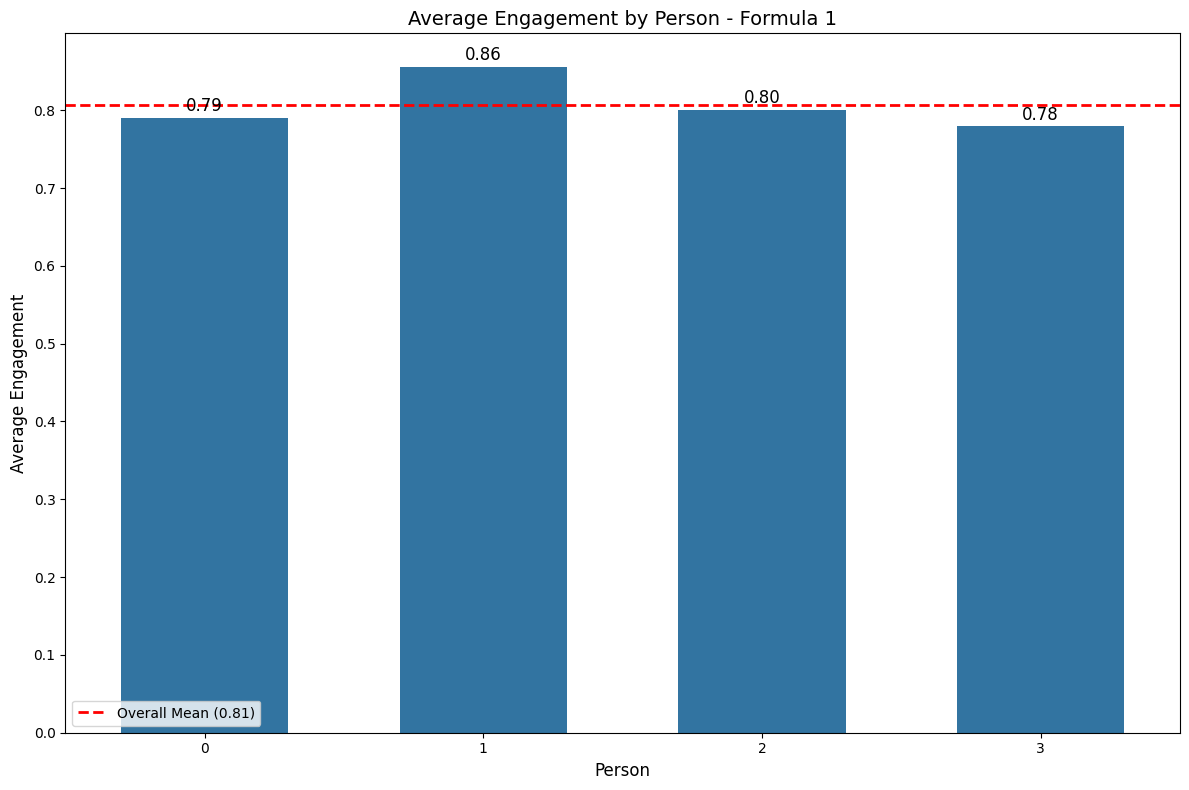

person
0    0.811071
1    0.897859
2    0.842993
3    0.788040
Name: engagement2, dtype: float64
Gráfico salvo como: engagement2.png


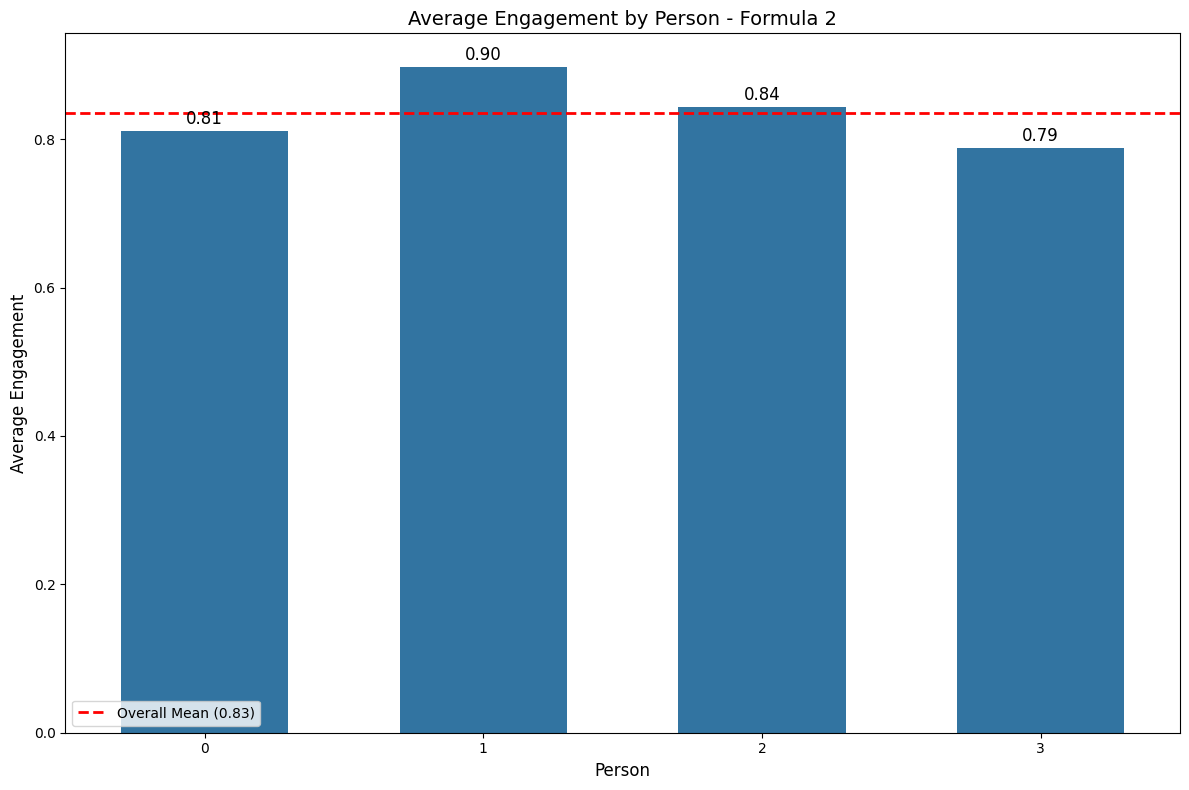

person
0    0.794476
1    0.863289
2    0.806791
3    0.774231
Name: engagement3, dtype: float64
Gráfico salvo como: engagement3.png


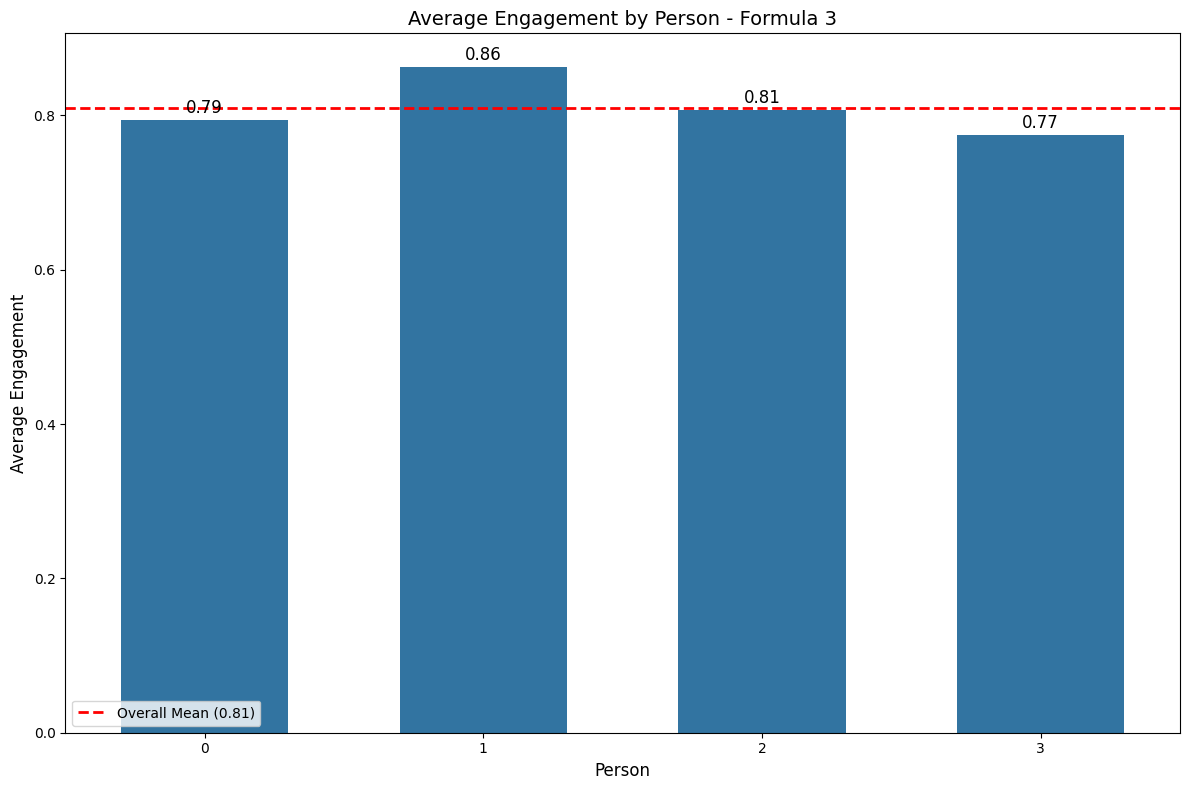

person
0    0.765606
1    0.863871
2    0.811447
3    0.789783
Name: engagement4, dtype: float64
Gráfico salvo como: engagement4.png


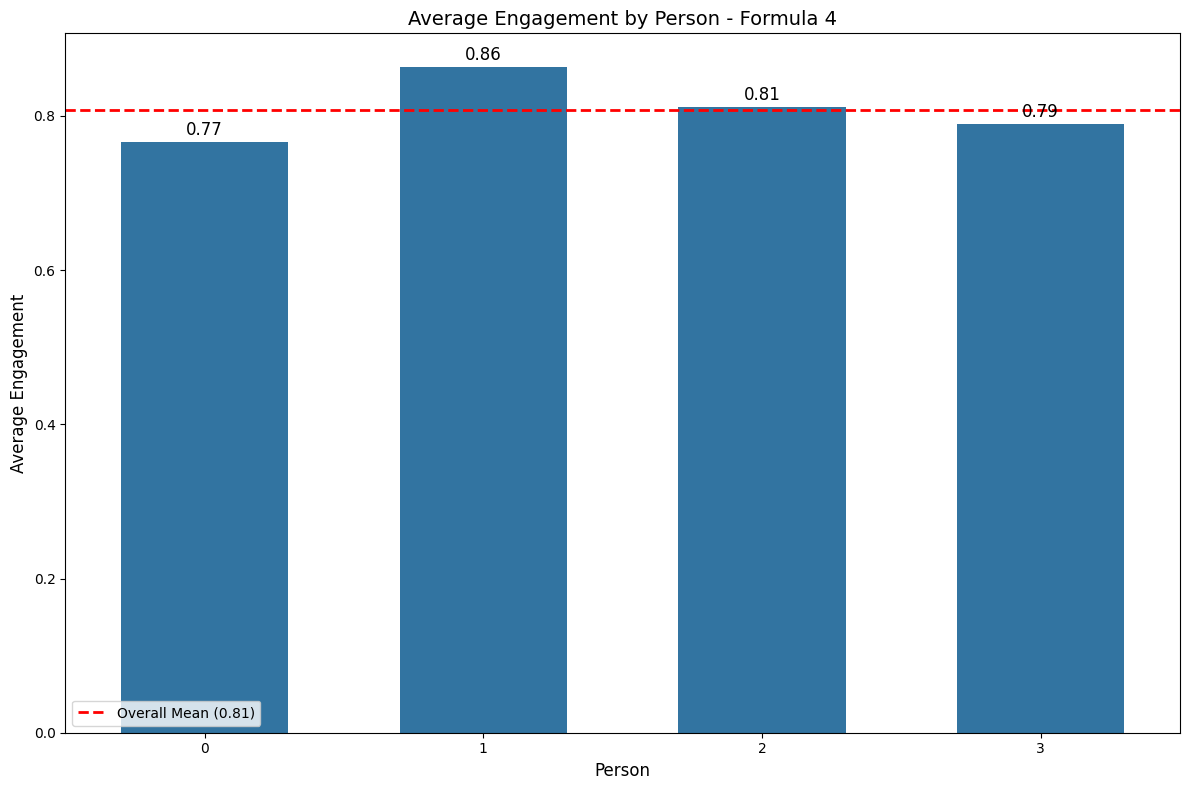

person
0    0.803658
1    0.886959
2    0.836947
3    0.781877
Name: engagement5, dtype: float64
Gráfico salvo como: engagement5.png


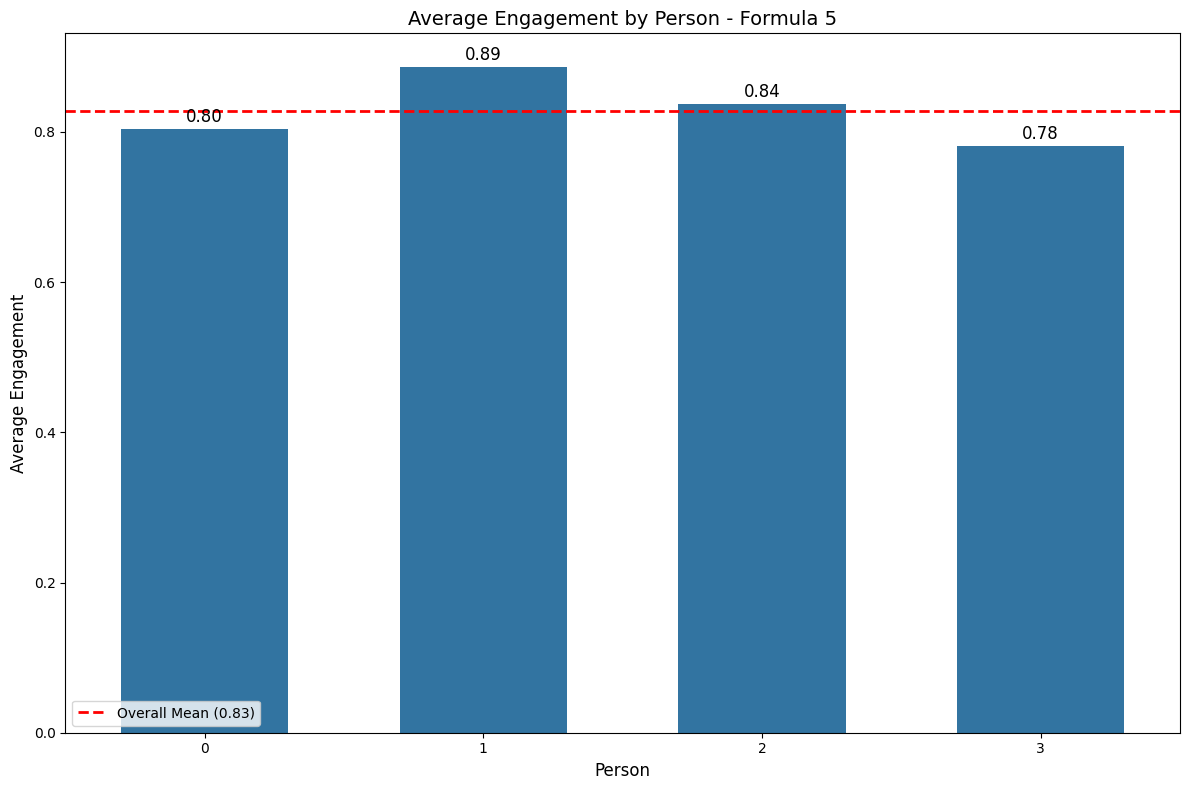

person
0    0.800554
1    0.829141
2    0.694513
3    0.726706
Name: engagement6, dtype: float64
Gráfico salvo como: engagement6.png


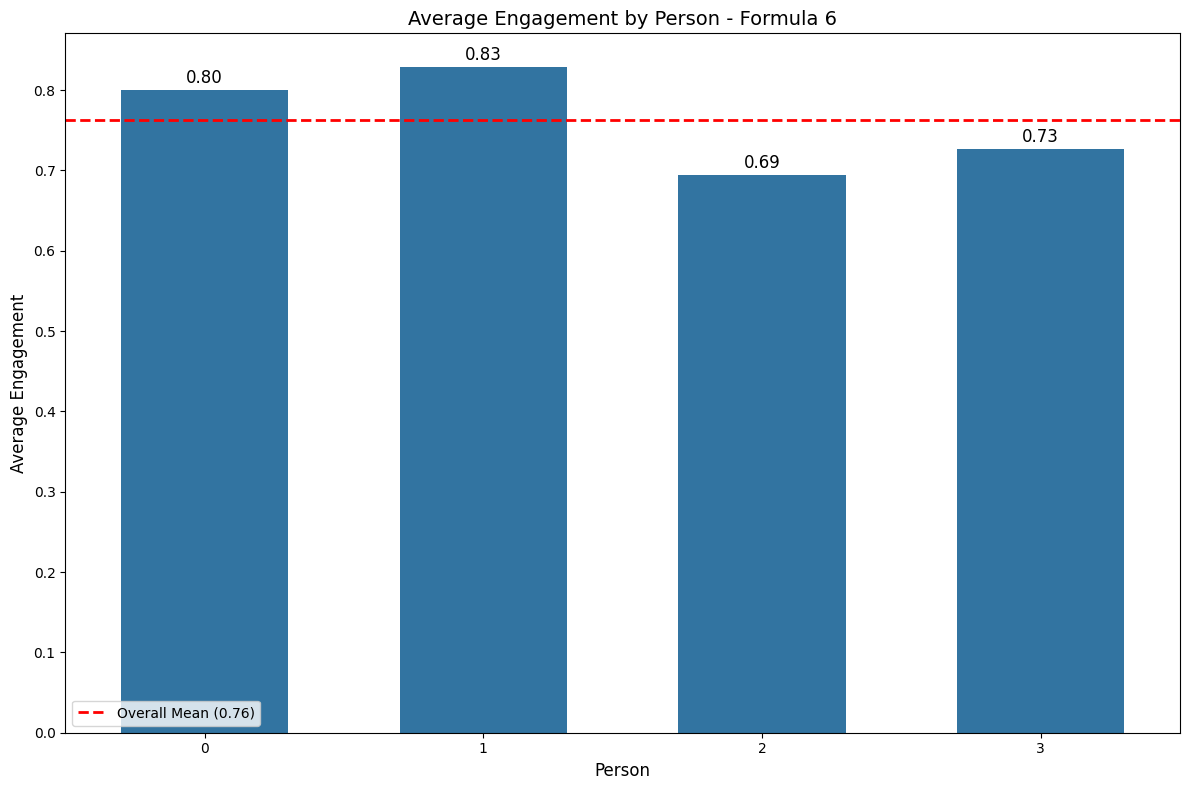

person
0    0.727020
1    0.817389
2    0.779175
3    0.768941
Name: engagement7, dtype: float64
Gráfico salvo como: engagement7.png


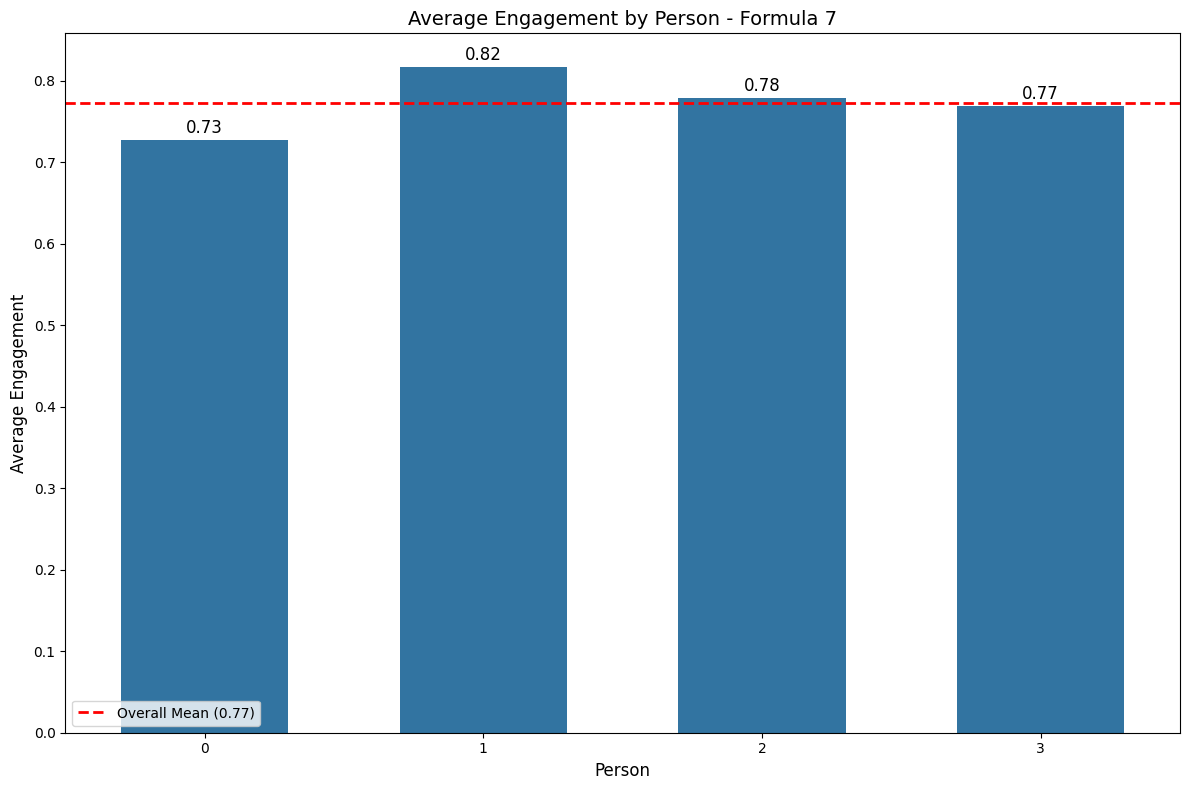

person
0    0.687375
1    0.757005
2    0.645293
3    0.660558
Name: engagement8, dtype: float64
Gráfico salvo como: engagement8.png


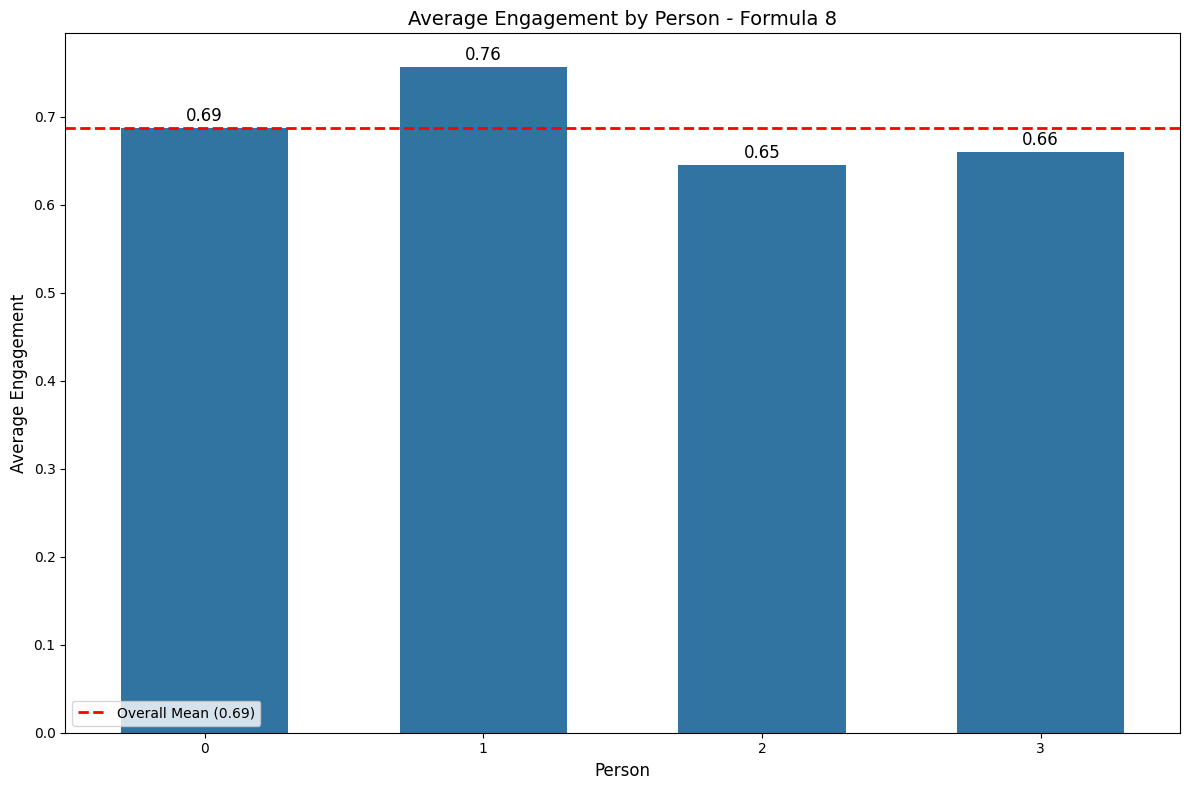

person
0    0.805326
1    0.925266
2    0.833263
3    0.799768
Name: engagement9, dtype: float64
Gráfico salvo como: engagement9.png


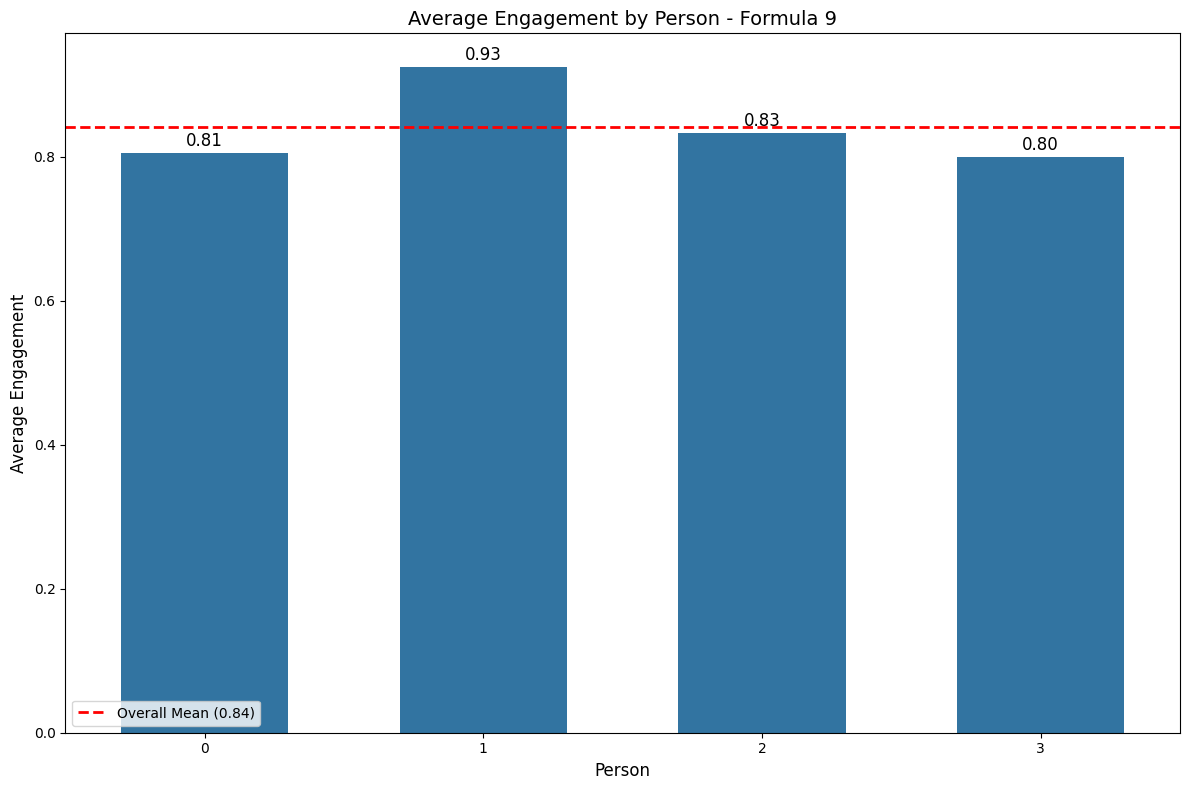

person
0    0.982772
1    0.980594
2    0.977381
3    0.978542
Name: engagement10, dtype: float64
Gráfico salvo como: engagement10.png


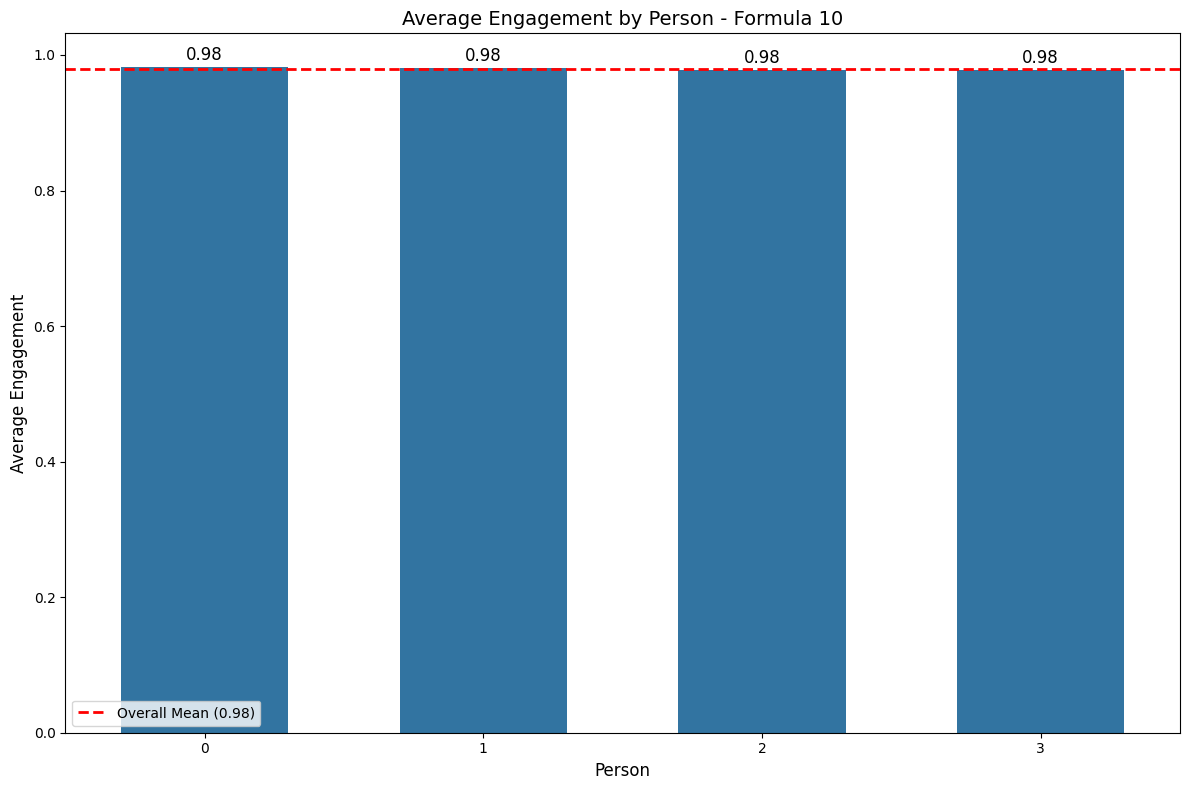

person
0    0.822133
1    0.794420
2    0.751242
3    0.765788
Name: engagement11, dtype: float64
Gráfico salvo como: engagement11.png


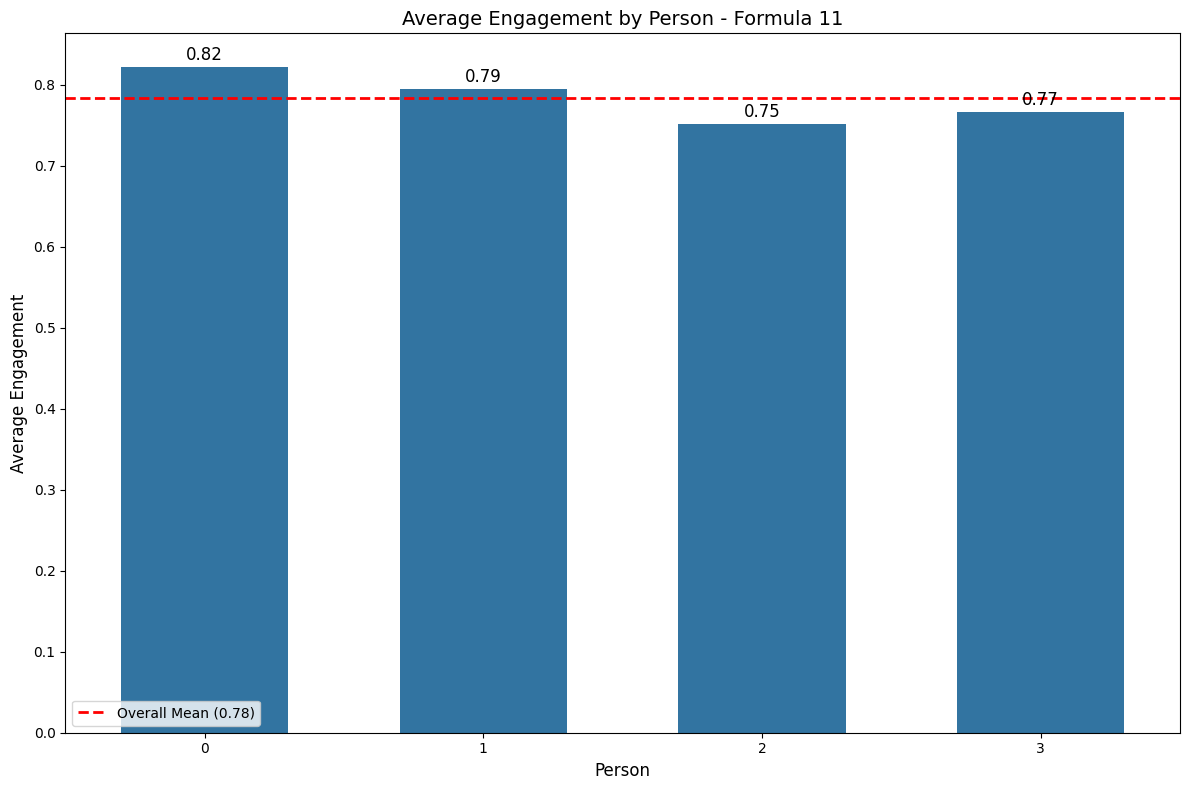

person
0    0.981814
1    0.989985
2    0.988224
3    0.979767
Name: engagement12, dtype: float64
Gráfico salvo como: engagement12.png


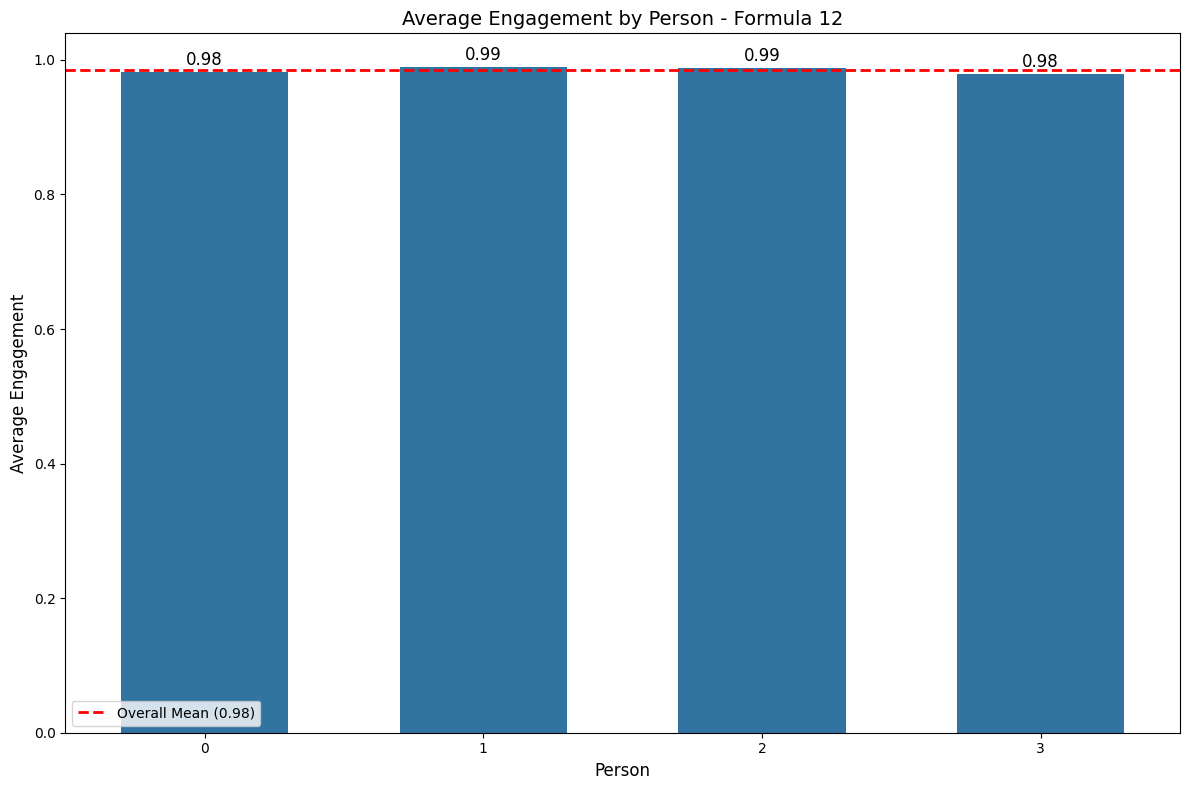

In [48]:
i = 0

while i < 13:
    formula = f'engagement{i}'
    group_cluster_engagment = data.groupby(['person'])
    print(group_cluster_engagment[formula].mean())

    engagement_means = data.groupby('person')[formula].mean().reset_index()

    plt.figure(figsize=(12, 8))
    ax = sns.barplot(
        x='person', 
        y=formula, 
        data=engagement_means,
        width=0.6,
    )

    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height:.2f}',  
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', va='baseline', 
                        fontsize=12,
                        xytext=(0, 5), 
                        textcoords='offset points')

    overall_mean = engagement_means[formula].mean()
    plt.axhline(overall_mean, color='red', linestyle='--', linewidth=2, label=f'Overall Mean ({overall_mean:.2f})')

    plt.title(f'Average Engagement by Person - Formula {i}', fontsize=14)
    plt.xlabel('Person', fontsize=12)
    plt.ylabel('Average Engagement', fontsize=12)
    plt.legend(title='', loc='lower left')
    
    # Salvar o gráfico na pasta atual
    os.makedirs(formula,exist_ok=True)
    filename = f'{formula}.png'
    plt.tight_layout()
    plt.savefig(f'{formula}/{filename}')
    print(f'Gráfico salvo como: {filename}')
    
    plt.show()
    i += 1


### Engagement by Time

-------------------------------------------------------------------------------------------
Gráfico salvo como: engagement0/graphic_engagement_engagement0.png


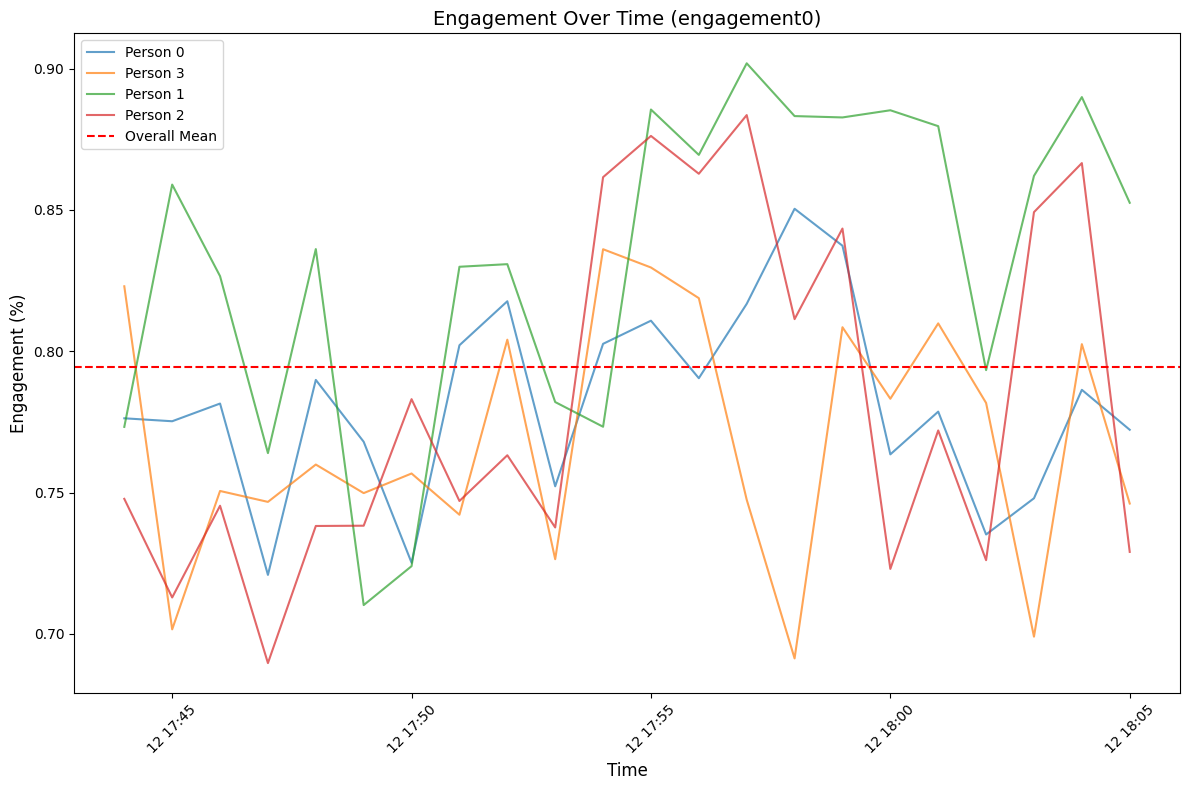

Gráfico salvo como: engagement1/graphic_engagement_engagement1.png


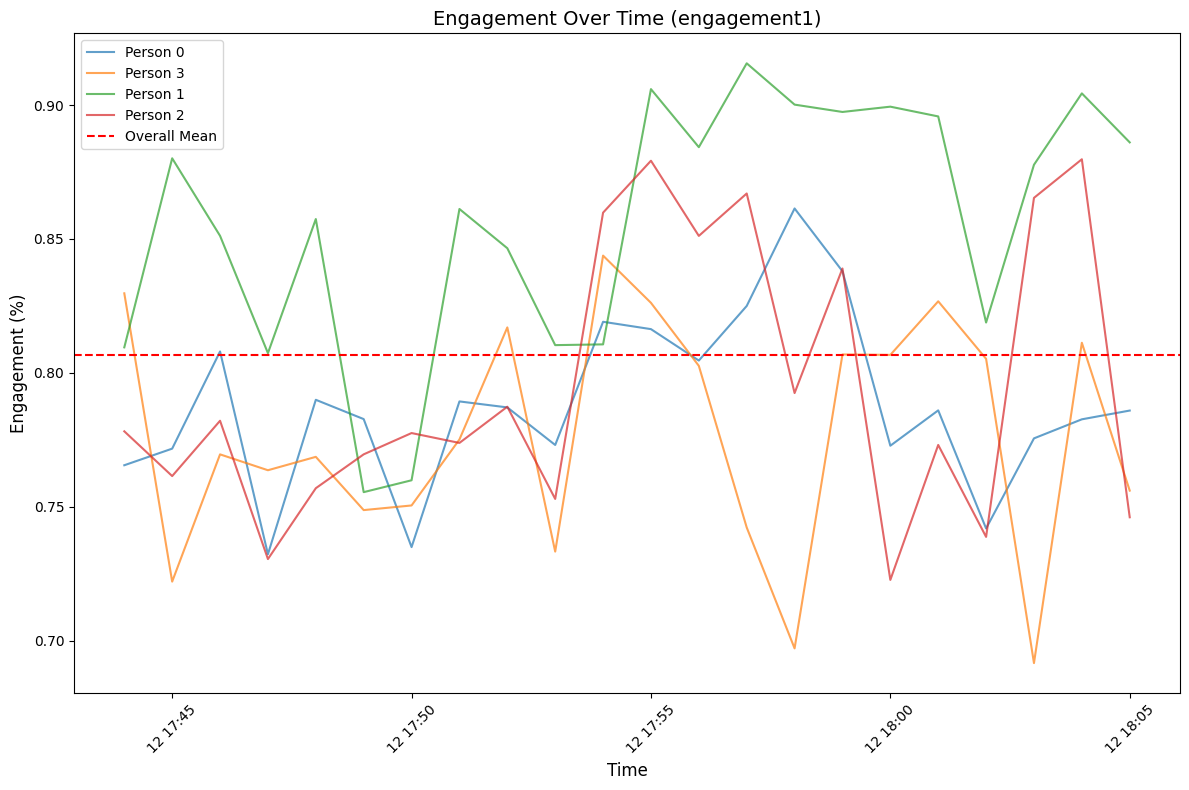

Gráfico salvo como: engagement2/graphic_engagement_engagement2.png


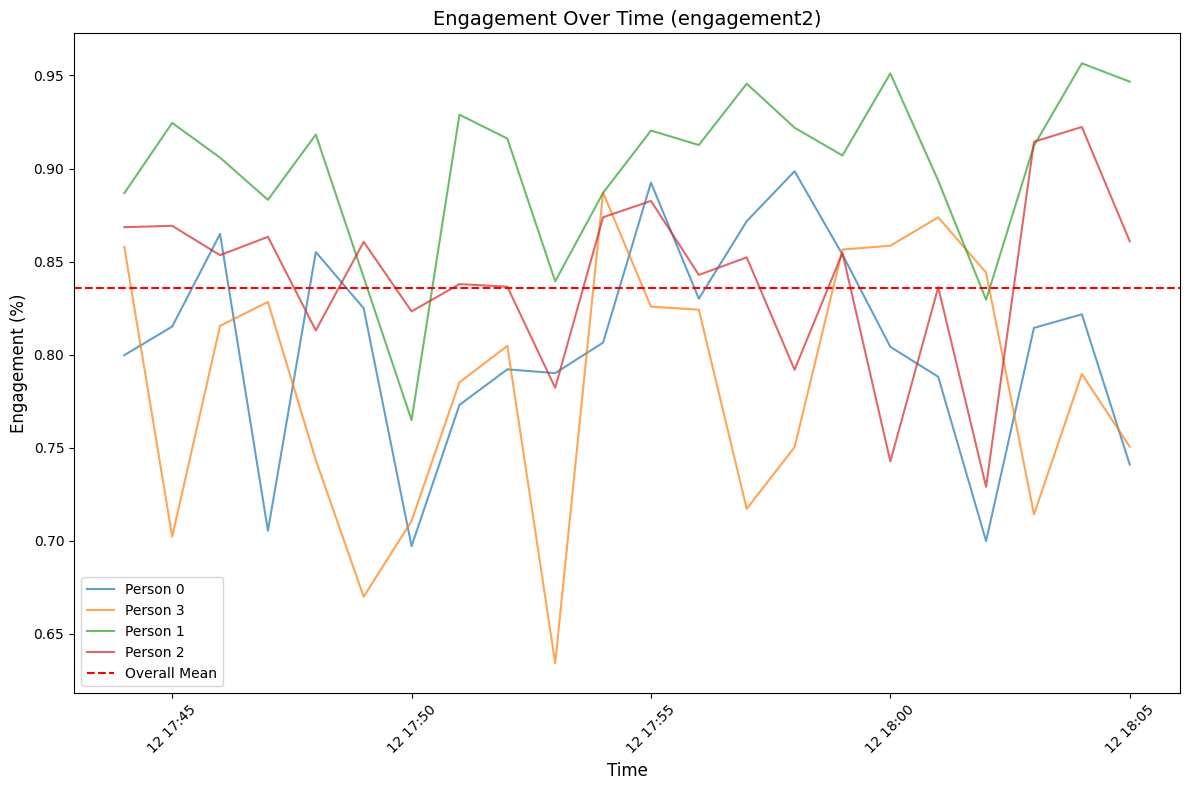

Gráfico salvo como: engagement3/graphic_engagement_engagement3.png


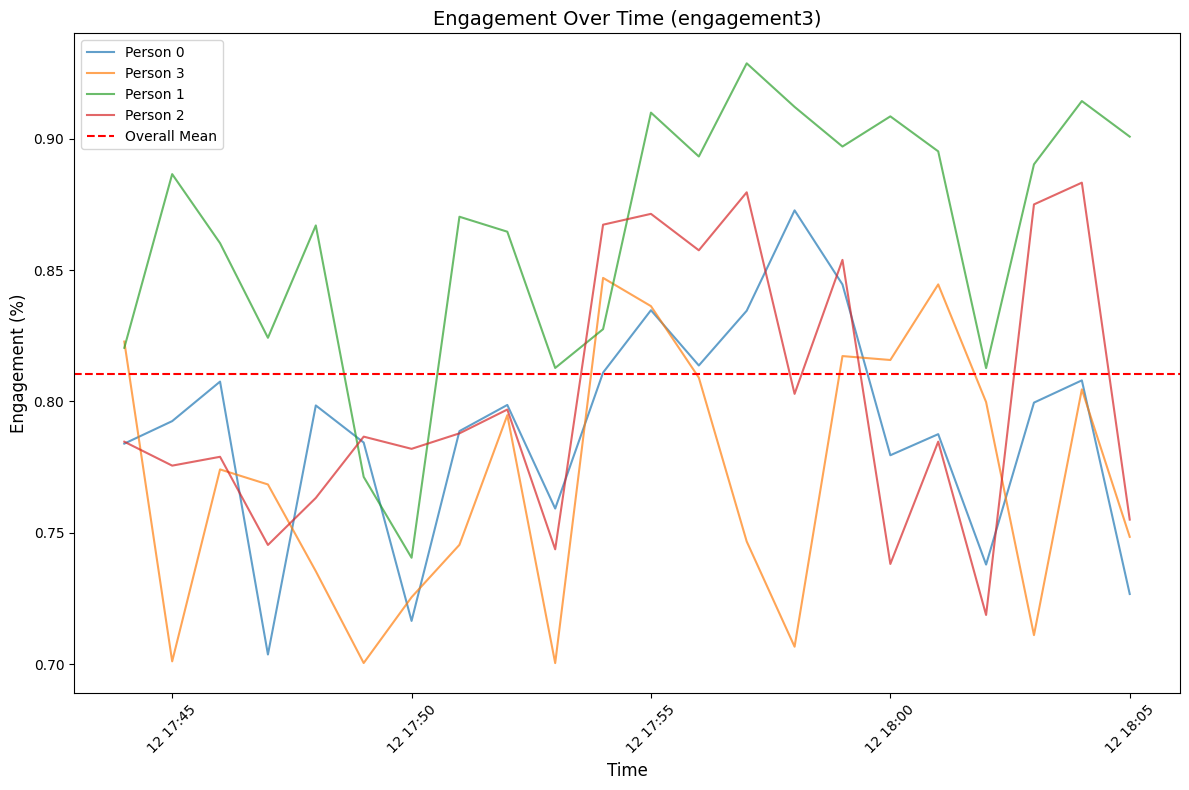

Gráfico salvo como: engagement4/graphic_engagement_engagement4.png


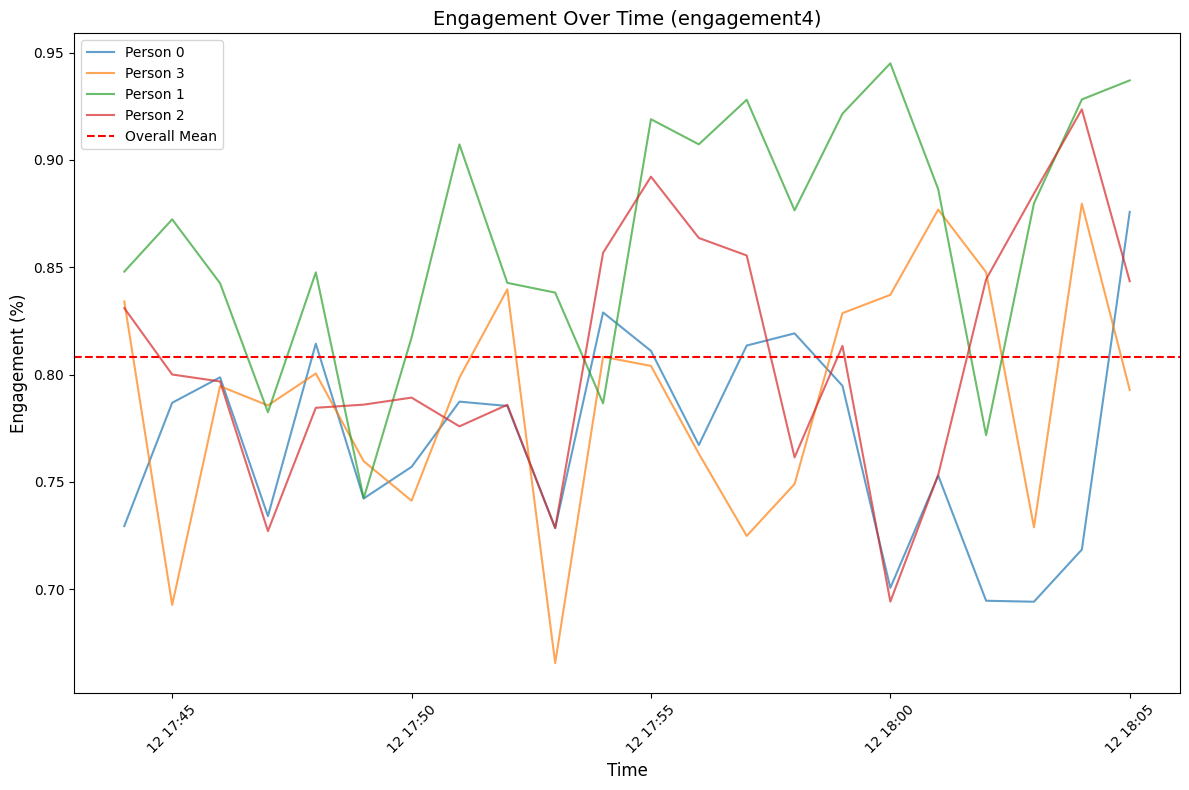

Gráfico salvo como: engagement5/graphic_engagement_engagement5.png


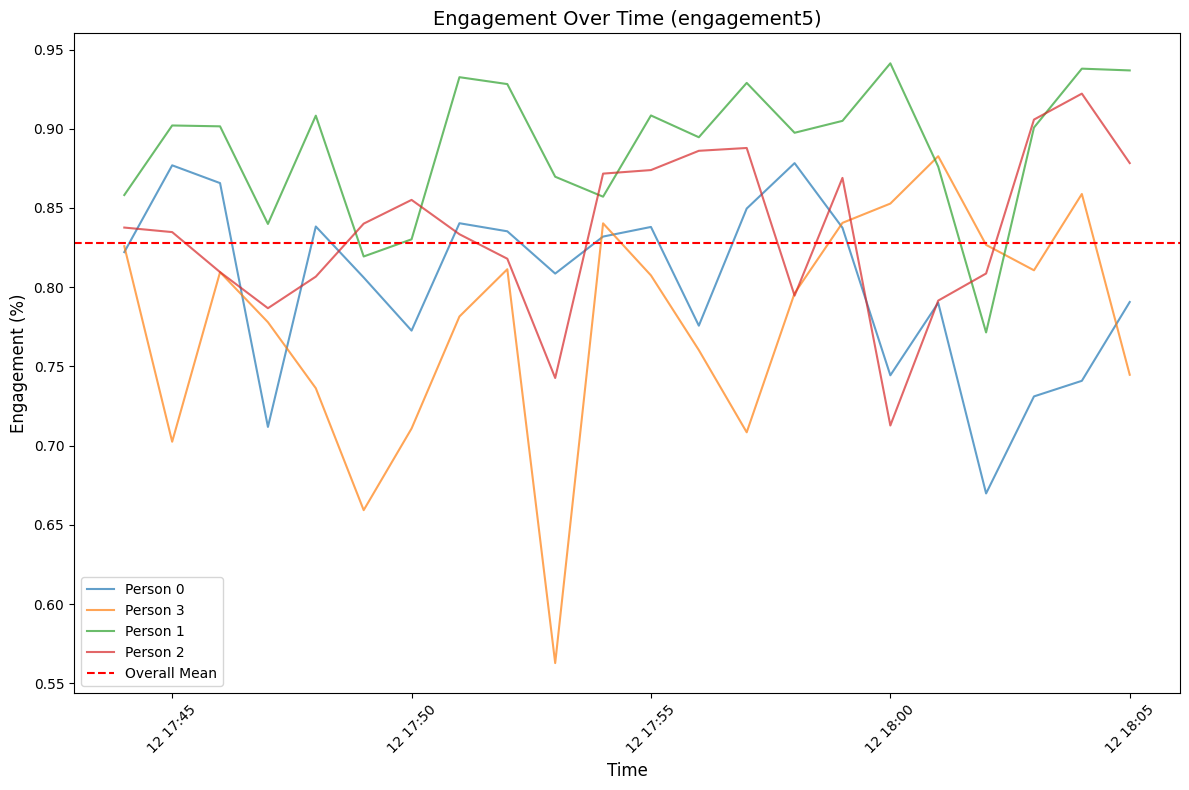

Gráfico salvo como: engagement6/graphic_engagement_engagement6.png


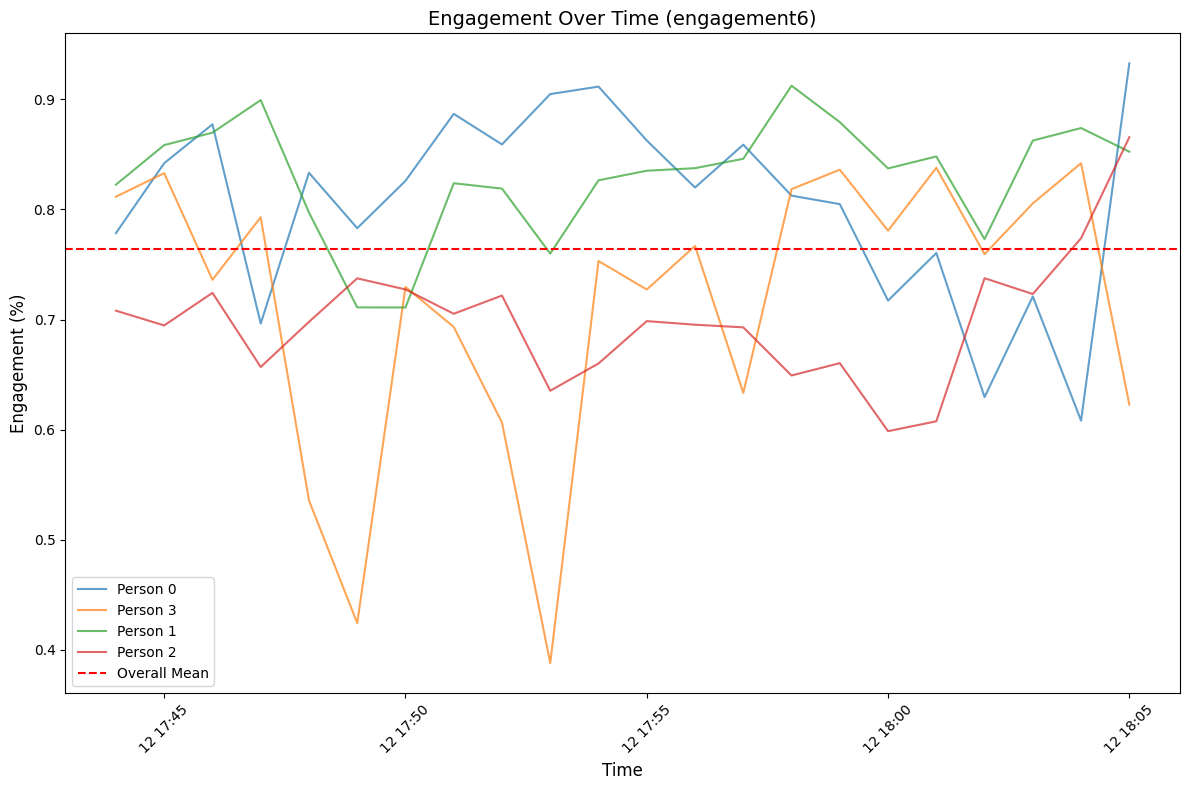

Gráfico salvo como: engagement7/graphic_engagement_engagement7.png


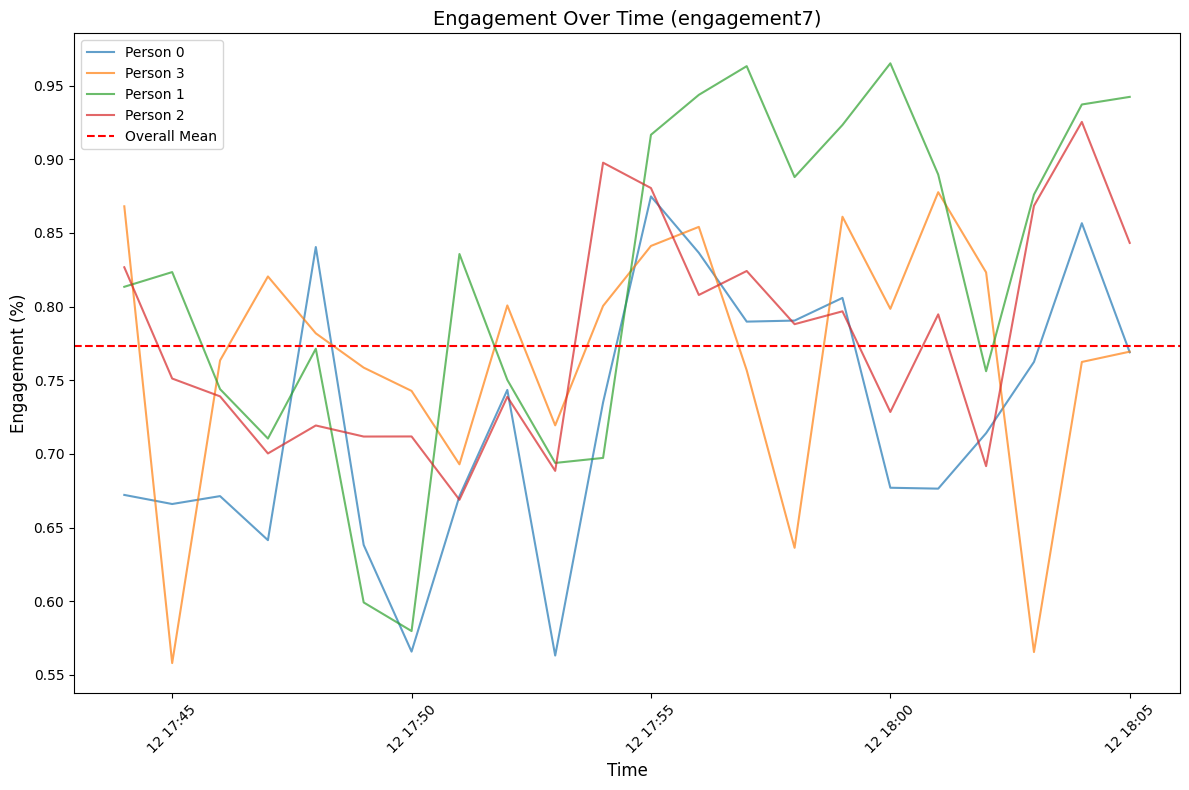

Gráfico salvo como: engagement8/graphic_engagement_engagement8.png


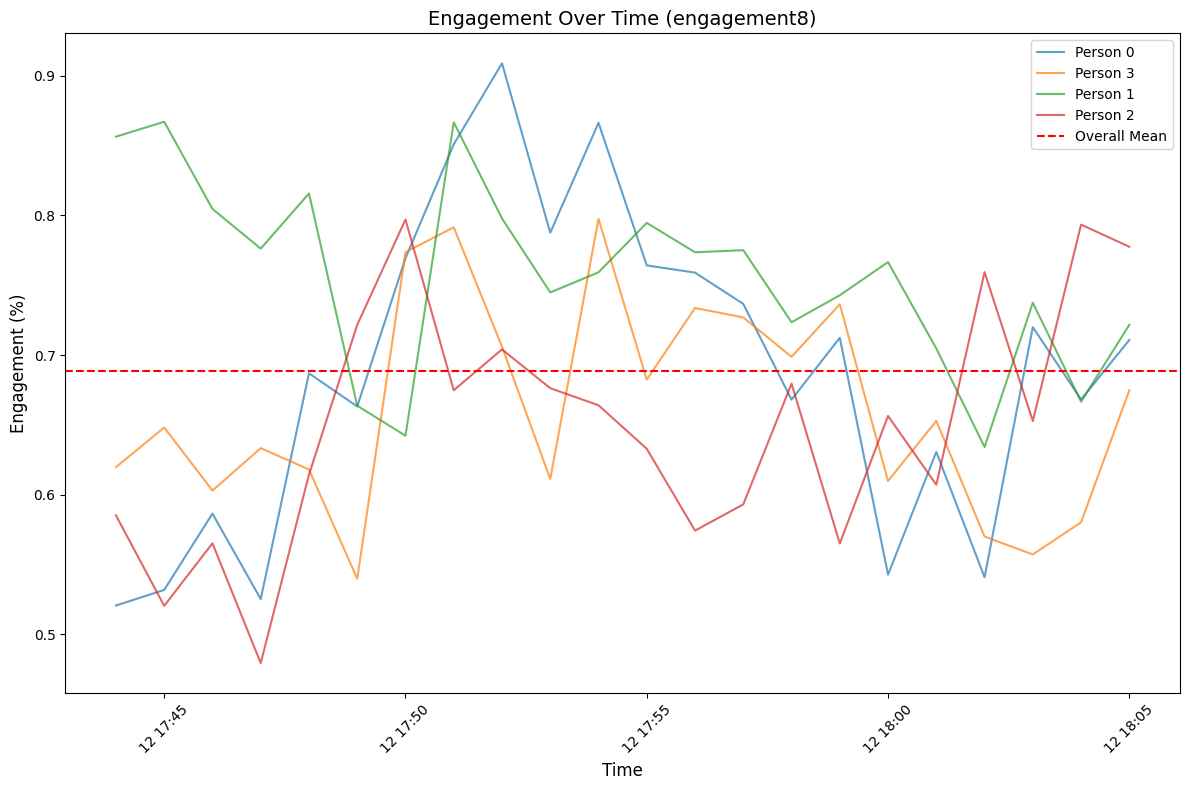

Gráfico salvo como: engagement9/graphic_engagement_engagement9.png


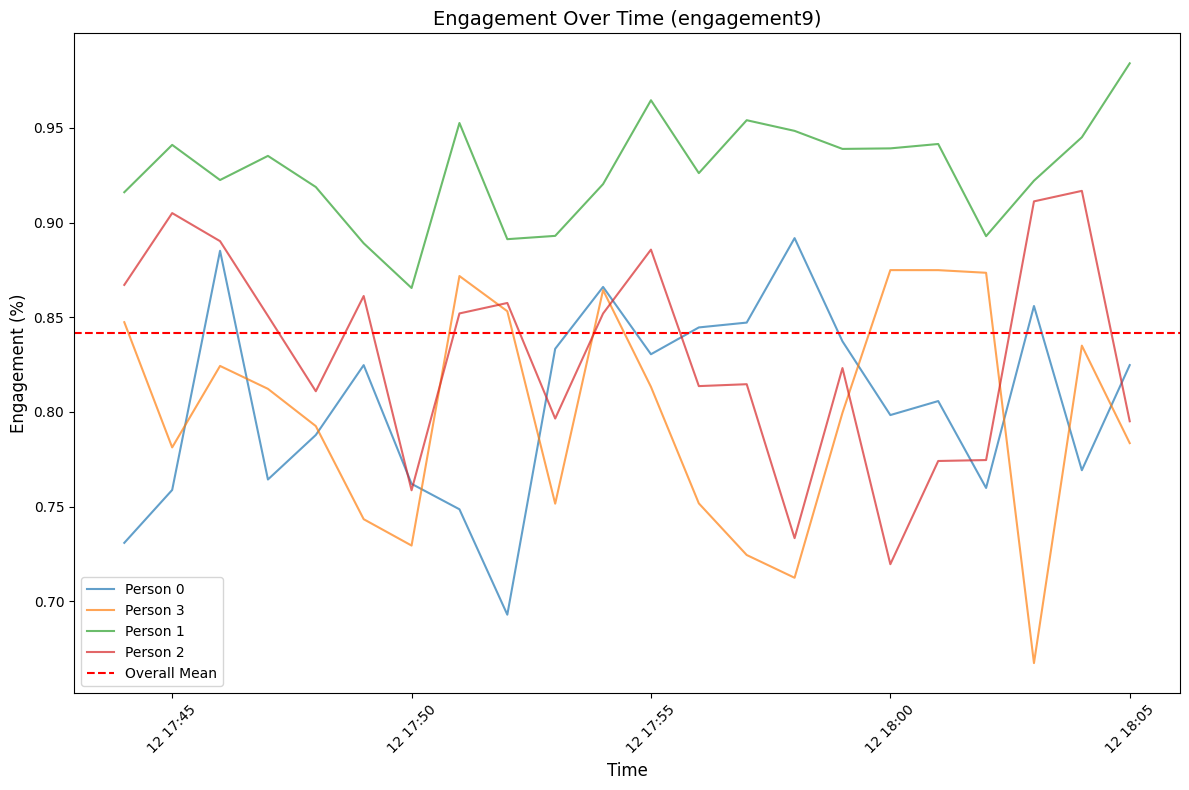

Gráfico salvo como: engagement10/graphic_engagement_engagement10.png


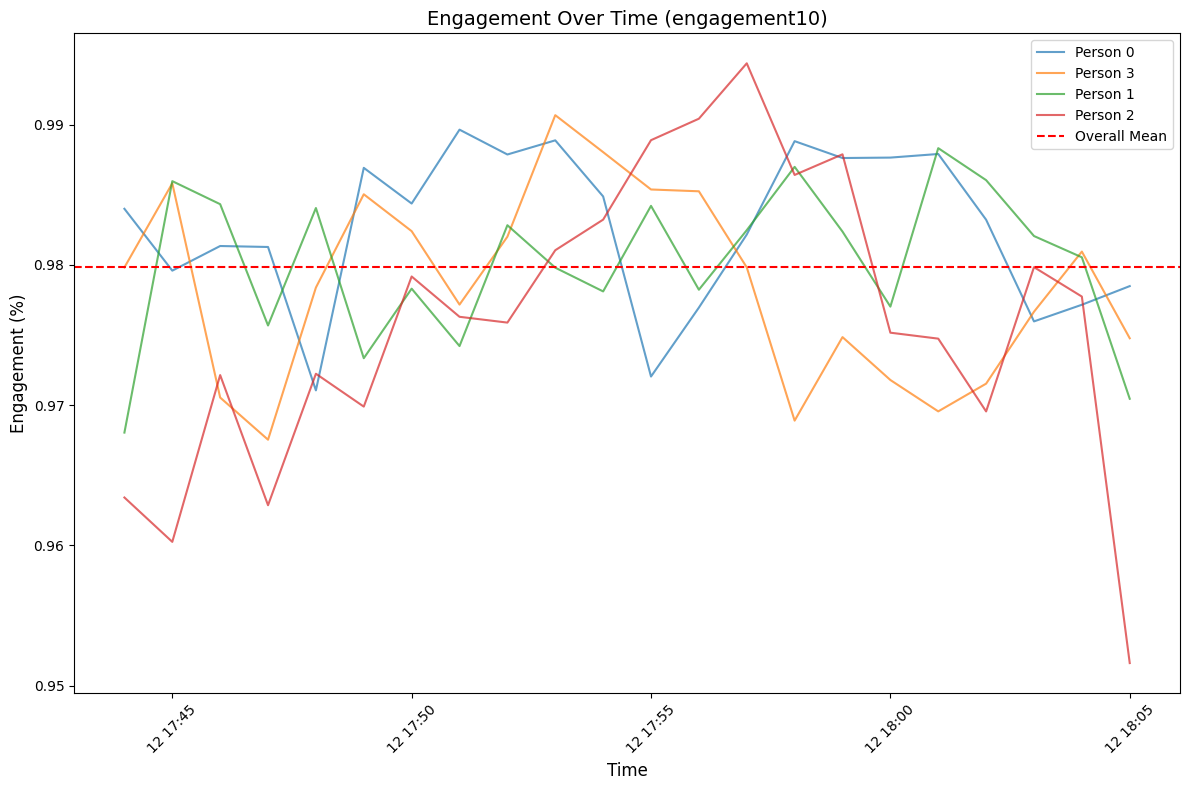

Gráfico salvo como: engagement11/graphic_engagement_engagement11.png


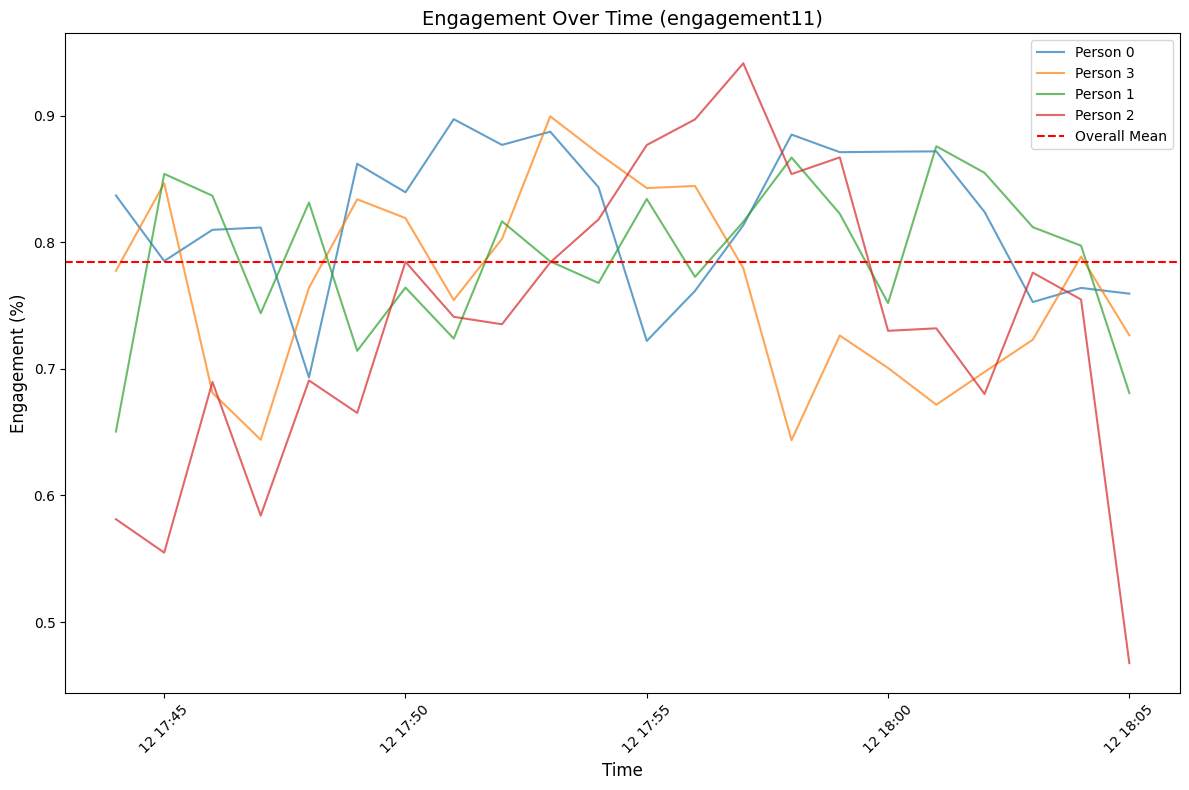

Gráfico salvo como: engagement12/graphic_engagement_engagement12.png


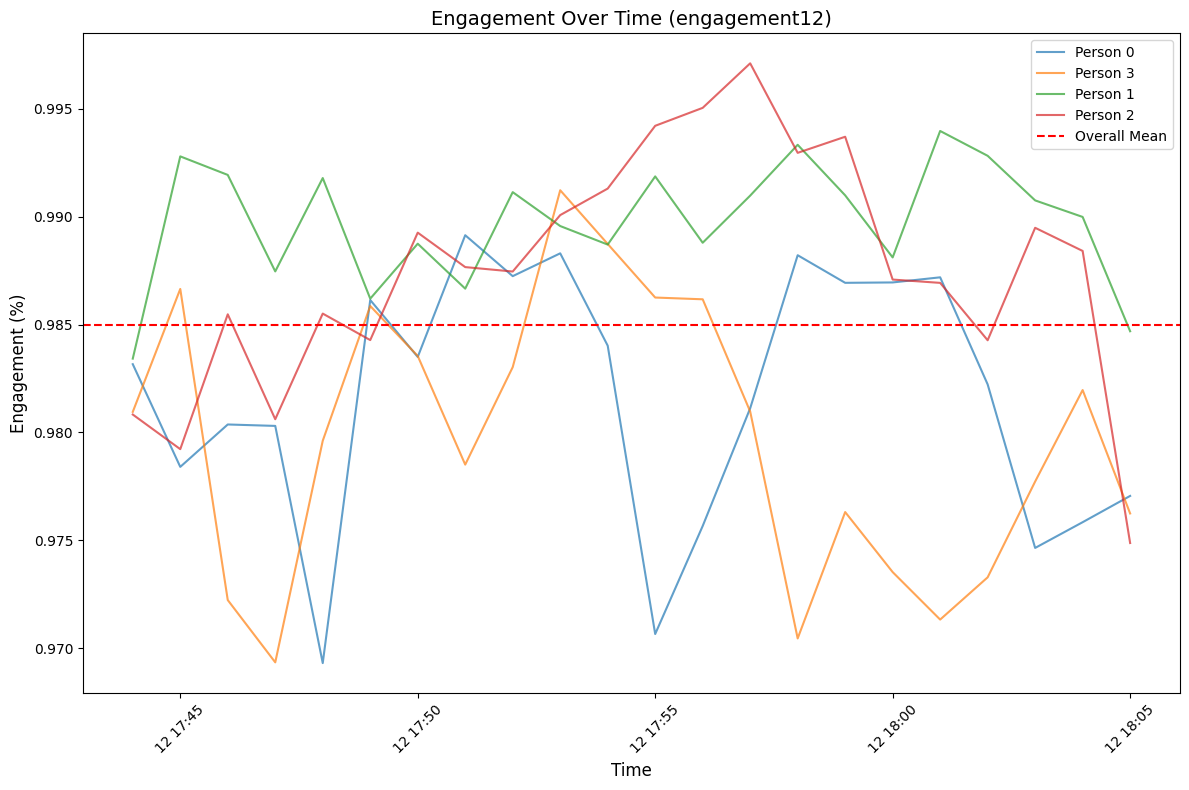

In [49]:
time_adjust = '1 min'  # Ajuste para intervalos de tempo (1 minuto no exemplo)

# Obtemos todas as fórmulas de engajamento
formula_columns = [col for col in data.columns if col.startswith('engagement')]

print("-------------------------------------------------------------------------------------------")

# Iterar por cada fórmula de engajamento
for formula in formula_columns:
    plt.figure(figsize=(12, 8))  # Configura o tamanho do gráfico
    
    # Para cada pessoa, plotar sua linha de engajamento
    for person in data['person'].unique():
        data_person = data[data['person'] == person]
        data_person.set_index('datetime', inplace=True)

        # Calcula a média do engajamento no intervalo de tempo especificado
        grouped_data = data_person[formula].resample(time_adjust).mean()
        
        # Plotar a linha da pessoa
        plt.plot(
            grouped_data.index, 
            grouped_data.values, 
            label=f'Person {person}', 
            alpha=0.7
        )

    # Personalizar o gráfico
    plt.title(f'Engagement Over Time ({formula})', fontsize=14)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Engagement (%)', fontsize=12)
    plt.xticks(rotation=45)
    plt.axhline(data[formula].mean(), color='red', linestyle='--', label='Overall Mean')
    plt.legend()
    plt.tight_layout()

    # Salvar o gráfico
    filename = f'{formula}/graphic_engagement_{formula}.png'
    plt.savefig(filename)
    print(f'Gráfico salvo como: {filename}')
    plt.show()


## Correlation Matrix

### Values

In [50]:
data_dicts = {
    'Head Pitch': data.groupby(['person'])['head_pitch_adjusted'].mean().to_dict(),
    'Head Yaw': data.groupby(['person'])['head_yaw_adjusted'].mean().to_dict(),
    'Head Roll': data.groupby(['person'])['head_roll_adjusted'].mean().to_dict(),
    'Gaze Pitch': data.groupby(['person'])['gaze_pitch_adjusted'].mean().to_dict(),
    'Gaze Yaw': data.groupby(['person'])['gaze_yaw_adjusted'].mean().to_dict(),
    'Head Gaze Diff Yaw': data.groupby(['person'])['head_gaze_diff_yaw_abs'].mean().to_dict(),
    'Head Gaze Diff Pitch': data.groupby(['person'])['head_gaze_diff_pitch_abs'].mean().to_dict(),
    'Head Movement X': data.groupby(['person'])['head_movement_x_abs_10s'].mean().to_dict(),
    'Head Movement Y': data.groupby(['person'])['head_movement_y_abs_10s'].mean().to_dict(),
    'Head Movement Z': data.groupby(['person'])['head_movement_z_abs_10s'].mean().to_dict(),

    'Engagement 0': data.groupby(['person'])['engagement0'].mean().to_dict(),
    'Engagement 1': data.groupby(['person'])['engagement1'].mean().to_dict(),
    'Engagement 2': data.groupby(['person'])['engagement2'].mean().to_dict(),
    'Engagement 3': data.groupby(['person'])['engagement3'].mean().to_dict(),
    'Engagement 4': data.groupby(['person'])['engagement4'].mean().to_dict(),
    'Engagement 5': data.groupby(['person'])['engagement5'].mean().to_dict(),
    'Engagement 6': data.groupby(['person'])['engagement6'].mean().to_dict(),
    'Engagement 7': data.groupby(['person'])['engagement7'].mean().to_dict(),
    'Engagement 8': data.groupby(['person'])['engagement8'].mean().to_dict(),
    'Engagement 9': data.groupby(['person'])['engagement9'].mean().to_dict(),
    'Engagement 10': data.groupby(['person'])['engagement10'].mean().to_dict(),
    'Engagement 11': data.groupby(['person'])['engagement11'].mean().to_dict(),
    'Engagement 12': data.groupby(['person'])['engagement12'].mean().to_dict(),
}

### Matrix

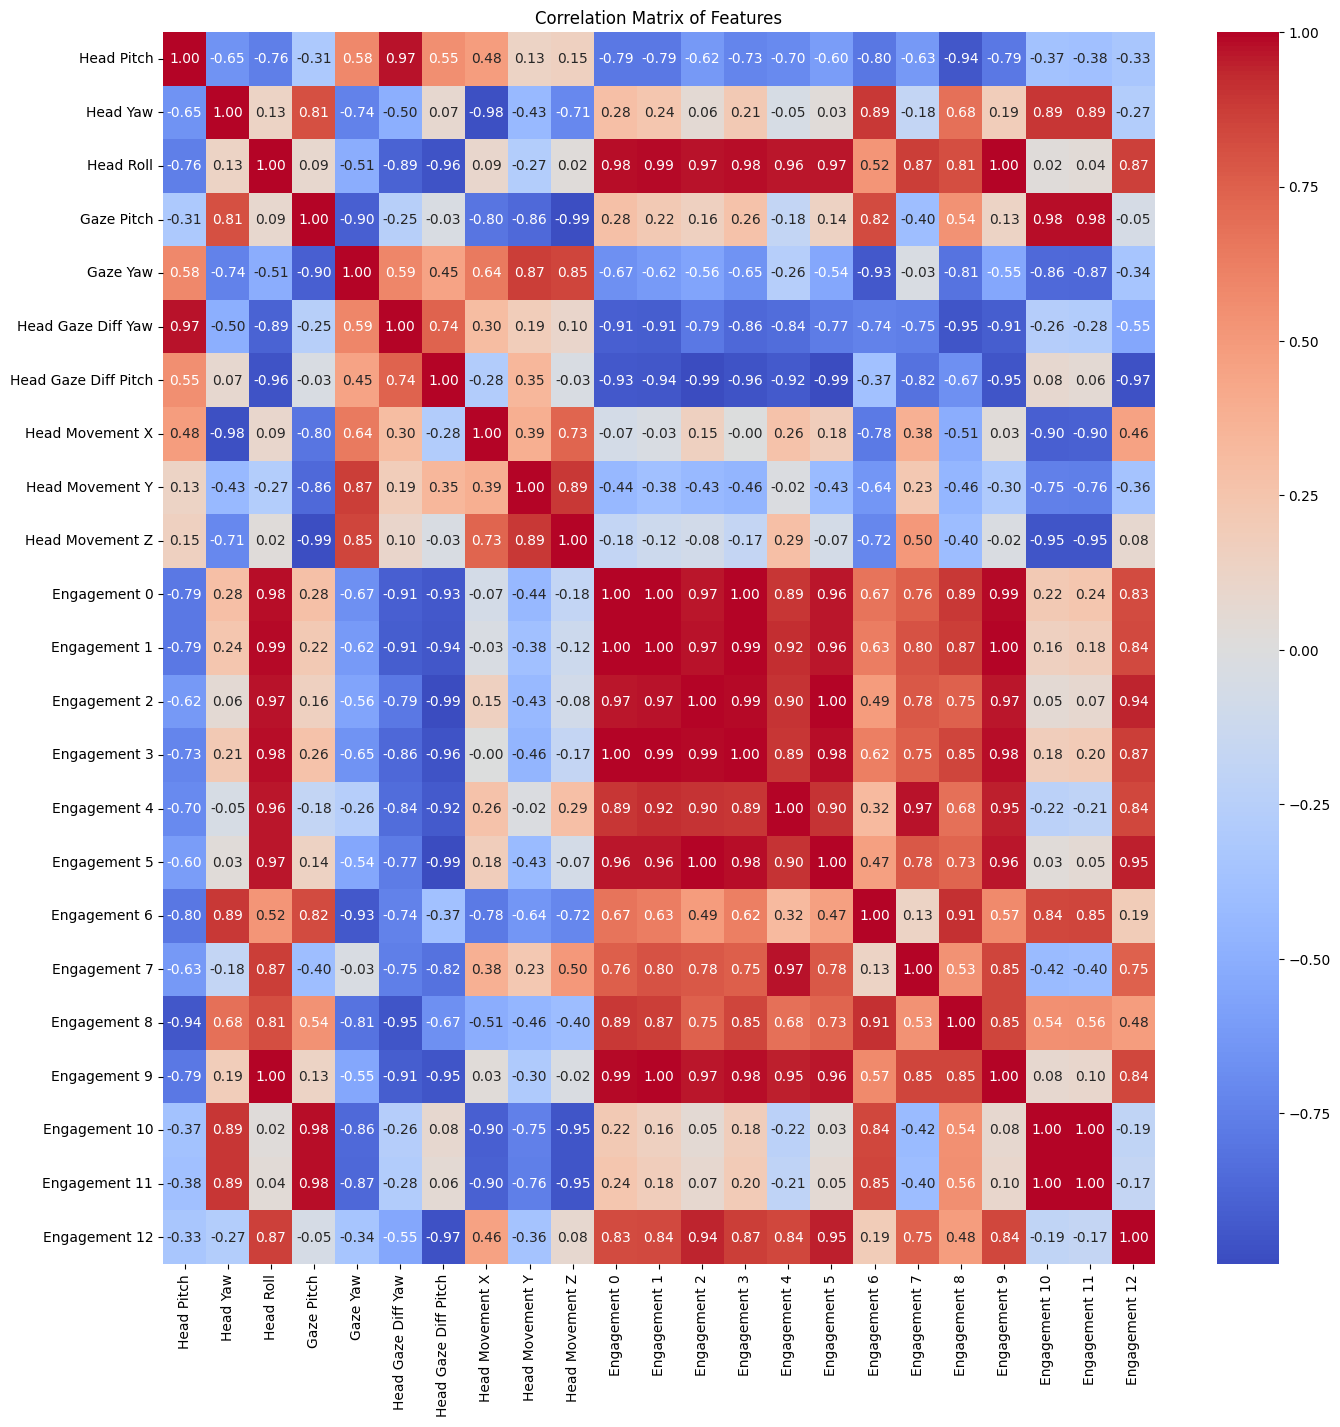

Engagement 0


,Feature,Correlation with Engagement
0,Engagement 0,1.000000
1,Engagement 1,0.997798
2,Engagement 3,0.995674
3,Engagement 9,0.987663
4,Head Roll,0.979775
5,Engagement 2,0.968515
6,Engagement 5,0.961234
7,Engagement 4,0.891415
8,Engagement 8,0.889998
9,Engagement 12,0.826154


Engagement 1


,Feature,Correlation with Engagement
0,Engagement 1,1.000000
1,Engagement 0,0.997798
2,Engagement 9,0.995875
3,Engagement 3,0.993466
4,Head Roll,0.990568
5,Engagement 2,0.970905
6,Engagement 5,0.964366
7,Engagement 4,0.919366
8,Engagement 8,0.874226
9,Engagement 12,0.836096


Engagement 2


,Feature,Correlation with Engagement
0,Engagement 2,1.000000
1,Engagement 5,0.999609
2,Engagement 3,0.986558
3,Head Roll,0.972739
4,Engagement 1,0.970905
5,Engagement 0,0.968515
6,Engagement 9,0.967244
7,Engagement 12,0.940287
8,Engagement 4,0.904778
9,Engagement 7,0.778964


Engagement 3


,Feature,Correlation with Engagement
0,Engagement 3,1.000000
1,Engagement 0,0.995674
2,Engagement 1,0.993466
3,Engagement 2,0.986558
4,Engagement 9,0.983355
5,Engagement 5,0.981601
6,Head Roll,0.979567
7,Engagement 4,0.891602
8,Engagement 12,0.872234
9,Engagement 8,0.848502


Engagement 4


,Feature,Correlation with Engagement
0,Engagement 4,1.000000
1,Engagement 7,0.969525
2,Head Roll,0.963392
3,Engagement 9,0.951040
4,Engagement 1,0.919366
5,Engagement 2,0.904778
6,Engagement 5,0.904322
7,Engagement 3,0.891602
8,Engagement 0,0.891415
9,Engagement 12,0.840267


Engagement 5


,Feature,Correlation with Engagement
0,Engagement 5,1.000000
1,Engagement 2,0.999609
2,Engagement 3,0.981601
3,Head Roll,0.968824
4,Engagement 1,0.964366
5,Engagement 9,0.961765
6,Engagement 0,0.961234
7,Engagement 12,0.949422
8,Engagement 4,0.904322
9,Engagement 7,0.780818


Engagement 6


,Feature,Correlation with Engagement
0,Engagement 6,1.000000
1,Engagement 8,0.909543
2,Head Yaw,0.890653
3,Engagement 11,0.849680
4,Engagement 10,0.841143
5,Gaze Pitch,0.823528
6,Engagement 0,0.669051
7,Engagement 1,0.630246
8,Engagement 3,0.621181
9,Engagement 9,0.572663


Engagement 7


,Feature,Correlation with Engagement
0,Engagement 7,1.000000
1,Engagement 4,0.969525
2,Head Roll,0.868994
3,Engagement 9,0.849313
4,Engagement 1,0.797915
5,Engagement 5,0.780818
6,Engagement 2,0.778964
7,Engagement 0,0.756180
8,Engagement 3,0.753529
9,Engagement 12,0.745160


Engagement 8


,Feature,Correlation with Engagement
0,Engagement 8,1.000000
1,Engagement 6,0.909543
2,Engagement 0,0.889998
3,Engagement 1,0.874226
4,Engagement 3,0.848502
5,Engagement 9,0.846411
6,Head Roll,0.813558
7,Engagement 2,0.750653
8,Engagement 5,0.731876
9,Engagement 4,0.681360


Engagement 9


,Feature,Correlation with Engagement
0,Engagement 9,1.000000
1,Head Roll,0.998261
2,Engagement 1,0.995875
3,Engagement 0,0.987663
4,Engagement 3,0.983355
5,Engagement 2,0.967244
6,Engagement 5,0.961765
7,Engagement 4,0.951040
8,Engagement 7,0.849313
9,Engagement 8,0.846411


Engagement 10


,Feature,Correlation with Engagement
0,Engagement 10,1.000000
1,Engagement 11,0.999793
2,Gaze Pitch,0.981707
3,Head Yaw,0.894870
4,Engagement 6,0.841143
5,Engagement 8,0.541785
6,Engagement 0,0.218012
7,Engagement 3,0.180061
8,Engagement 1,0.158497
9,Head Gaze Diff Pitch,0.077354


Engagement 11


,Feature,Correlation with Engagement
0,Engagement 11,1.000000
1,Engagement 10,0.999793
2,Gaze Pitch,0.983800
3,Head Yaw,0.894248
4,Engagement 6,0.849680
5,Engagement 8,0.555783
6,Engagement 0,0.237172
7,Engagement 3,0.199742
8,Engagement 1,0.177747
9,Engagement 9,0.095188


In [51]:
df = pd.DataFrame(data_dicts)

plt.figure(figsize=(16, 16))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Features")
plt.show()


for i in range(12):
    print(f'Engagement {i}')
    correlation_table = df.corr()[f'Engagement {i}'].sort_values(ascending=False)
    table = correlation_table.reset_index()
    table.columns = ['Feature', 'Correlation with Engagement']
    display(table)

In [52]:
data.columns

Index(['datetime', 'source', 'face', 'face_bbox_x1', 'face_bbox_y1',
       'face_bbox_x2', 'face_bbox_y2', 'head_yaw', 'head_pitch', 'head_roll',
       'left_eye_state', 'right_eye_state', 'left_eye_state_confidence',
       'right_eye_state_confidence', 'gaze_yaw', 'gaze_pitch',
       'facial_expression', 'race', 'gender', 'age', 'face_center_x',
       'face_center_y', 'face_area', 'person', 'time_block', 'gaze_pitch_mean',
       'gaze_yaw_mean', 'head_pitch_mean', 'head_yaw_mean', 'head_roll_mean',
       'gaze_pitch_adjusted', 'gaze_yaw_adjusted', 'head_pitch_adjusted',
       'head_yaw_adjusted', 'head_roll_adjusted', 'gaze_pitch_10s',
       'gaze_yaw_10s', 'head_pitch_10s', 'head_yaw_10s', 'head_roll_10s',
       'head_movement_x_abs', 'head_movement_x_abs_no_adjust',
       'head_movement_y_abs', 'head_movement_y_abs_no_adjust',
       'head_movement_z_abs', 'head_movement_z_abs_no_adjust',
       'head_movement_x_abs_10s', 'head_movement_y_abs_10s',
       'head_movement_z

## Create Final Dataset

In [53]:
data.to_csv('online_new.csv', index=False)